<a href="https://colab.research.google.com/github/kathisw/hemophilia/blob/main/KDD_CDC_KSBMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd
import numpy as np
from google.colab import files


uploaded = files.upload()

df = pd.read_excel(list(uploaded.keys())[0], sheet_name="CHBMP Variant List")

print("Dataset Shape:", df.shape)
print("Columns in Dataset:", df.columns)
df.head()


Saving CHBMP-Variant-List-2022 (2).xlsx to CHBMP-Variant-List-2022 (2).xlsx
Dataset Shape: (1399, 21)
Columns in Dataset: Index(['HGVS cDNA Name', 'Yoshitake Nucleotide No.', 'hg19 Nucleotide No.',
       'HGVS Protein Name', 'Mature Protein Change', 'Variant Type',
       'Mechanism', 'Exon', 'Codon', 'Domain', 'Subtype', 'Severe\n(<1U/dL)',
       'Moderate\n(1-5U/dL)', 'Mild\n(>5U/dL)', 'No FIX level given',
       'Reported\nSeverity', 'History of Inhibitor', 'Comments', 'Year',
       'Reference Number', 'Newly Added in the Current Version '],
      dtype='object')


,HGVS cDNA Name,Yoshitake Nucleotide No.,hg19 Nucleotide No.,HGVS Protein Name,Mature Protein Change,Variant Type,Mechanism,Exon,Codon,Domain,...,Severe\n(<1U/dL),Moderate\n(1-5U/dL),Mild\n(>5U/dL),No FIX level given,Reported\nSeverity,History of Inhibitor,Comments,Year,Reference Number,Newly Added in the Current Version
0,c.-29-?_391+?;521-?_1386+?del,1-?_10505+?;20363-?_31369+?del,g.138612895-?_138623348+?del;g.138633221-?_138...,NaN,del Exon 1-4; 6-8,Large Structure Change (>50bp),Deletion,"1-4, 6-8",NaN,NaN,...,X,NaN,NaN,NaN,Severe,Yes,NaN,2001,121,NaN
1,c.-29-?_88+?del,1-?_117+?del,g.138612895-?_138613011+?del,NaN,del Exon 1,Large Structure Change (>50bp),Deletion,1,NaN,NaN,...,X,NaN,NaN,NaN,Severe,Not Reported,FIX Yemen,1989,28,NaN
2,c.-29-?_520+?del,1-?_17797+?del,g.138612895-?_138630650+?del,NaN,del Exon 1-5,Large Structure Change (>50bp),Deletion,1-5,NaN,NaN,...,X,NaN,NaN,NaN,Severe,Yes,NaN,2012,144,NaN
3,c.-29-?_723+?del,1-?_20565+?del,g.138612895-?_138630650+?del,NaN,del Exon 1-6,Large Structure Change (>50bp),Deletion,1-6,NaN,NaN,...,X,NaN,NaN,NaN,Severe,No,NaN,2001,121,NaN
4,c.-29-?_723+?dup,1-?_20565+?dup,g.138612895-?_138630650+?dup,NaN,dup Exon 1-6,Large Structure Change (>50bp),Duplication,1-6,NaN,NaN,...,NaN,NaN,NaN,X,Not Reported,Not Reported,NaN,2019,185,X


In [4]:
# Define the function to classify severity from raw columns
def classify_severity(row):
    if "Severe" in str(row).strip():
        return "Severe"
    elif "Moderate" in str(row).strip():
        return "Moderate"
    elif "Mild" in str(row).strip():
        return "Mild"
    else:
        return "Not Reported"


In [5]:
df["Severity"] = df.apply(classify_severity, axis=1) # Change df_chbmp to df


In [6]:

print("Unique values in Severity Column:\n", df["Severe\n(<1U/dL)"].unique())


print("\nMissing values in Severity Column:", df["Severe\n(<1U/dL)"].isnull().sum())


df["Severity"] = df["Severe\n(<1U/dL)"].apply(lambda x: "Severe" if x == "X" else "Non-Severe")

print("\nCleaned Severity Column Sample:")
print(df[["Severe\n(<1U/dL)", "Severity"]].head())


print("\nSeverity Distribution:")
print(df["Severity"].value_counts())


Unique values in Severity Column:
 ['X' nan]

Missing values in Severity Column: 731

Cleaned Severity Column Sample:
  Severe\n(<1U/dL)    Severity
0                X      Severe
1                X      Severe
2                X      Severe
3                X      Severe
4              NaN  Non-Severe

Severity Distribution:
Severity
Non-Severe    731
Severe        668
Name: count, dtype: int64


In [7]:

print("Unique values in Inhibitor History Column:\n", df["History of Inhibitor"].unique())


print("\nMissing values in Inhibitor History Column:", df["History of Inhibitor"].isnull().sum())


df = df.dropna(subset=["History of Inhibitor"])


print("\nInhibitor Presence Distribution:")
print(df["History of Inhibitor"].value_counts())


df["Inhibitor_History"] = df["History of Inhibitor"].apply(lambda x:
                                                            "Yes" if x.strip().lower() == "yes" else
                                                            "No" if x.strip().lower() == "no" else
                                                            "Not Reported")


print("\nCleaned Inhibitor Column Sample:")
df[["History of Inhibitor", "Inhibitor_History"]].head()


print("\nFinal Inhibitor Presence Distribution:")
print(df["Inhibitor_History"].value_counts())


Unique values in Inhibitor History Column:
 ['Yes' 'Not Reported' 'No' 'Np' 'Not reported' 'No ']

Missing values in Inhibitor History Column: 0

Inhibitor Presence Distribution:
History of Inhibitor
Not Reported    1044
No               310
Yes               40
Not reported       3
Np                 1
No                 1
Name: count, dtype: int64

Cleaned Inhibitor Column Sample:

Final Inhibitor Presence Distribution:
Inhibitor_History
Not Reported    1048
No               311
Yes               40
Name: count, dtype: int64


<ipython-input-8-ef0b98fe430e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Inhibitor_History", palette="Oranges")


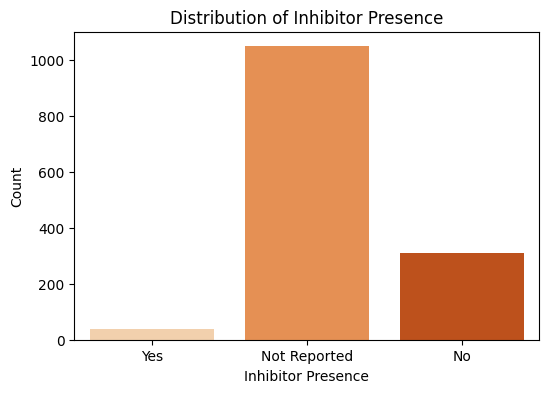


Missing values in Inhibitor-related columns:
Inhibitor_History    0
dtype: int64

Proportion of Inhibitor Cases (%):
Inhibitor_History
Not Reported    74.910650
No              22.230164
Yes              2.859185
Name: proportion, dtype: float64


In [8]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Inhibitor_History", palette="Oranges")
plt.title("Distribution of Inhibitor Presence")
plt.xlabel("Inhibitor Presence")
plt.ylabel("Count")
plt.show()


print("\nMissing values in Inhibitor-related columns:")
print(df[["Inhibitor_History"]].isnull().sum())


inhibitor_counts = df["Inhibitor_History"].value_counts(normalize=True) * 100
print("\nProportion of Inhibitor Cases (%):")
print(inhibitor_counts)


In [9]:

import pandas as pd
from google.colab import files


uploaded = files.upload()


chbmp_file_path = list(uploaded.keys())[0]


xls_chbmp = pd.ExcelFile(chbmp_file_path)
print("Available sheets in CHBMP dataset:", xls_chbmp.sheet_names)


df_chbmp = pd.read_excel(xls_chbmp, sheet_name="CHBMP Variant List")


df_chbmp.head()

Saving CHBMP-Variant-List-2022 (2).xlsx to CHBMP-Variant-List-2022 (2) (1).xlsx
Available sheets in CHBMP dataset: ['Table of Contents', 'CHBMP Variant List', 'Field Definitions', 'References', 'Figures', 'Tables', 'Database Methods', 'Exclusions', 'Instructions', 'Submission Form']


,HGVS cDNA Name,Yoshitake Nucleotide No.,hg19 Nucleotide No.,HGVS Protein Name,Mature Protein Change,Variant Type,Mechanism,Exon,Codon,Domain,...,Severe\n(<1U/dL),Moderate\n(1-5U/dL),Mild\n(>5U/dL),No FIX level given,Reported\nSeverity,History of Inhibitor,Comments,Year,Reference Number,Newly Added in the Current Version
0,c.-29-?_391+?;521-?_1386+?del,1-?_10505+?;20363-?_31369+?del,g.138612895-?_138623348+?del;g.138633221-?_138...,NaN,del Exon 1-4; 6-8,Large Structure Change (>50bp),Deletion,"1-4, 6-8",NaN,NaN,...,X,NaN,NaN,NaN,Severe,Yes,NaN,2001,121,NaN
1,c.-29-?_88+?del,1-?_117+?del,g.138612895-?_138613011+?del,NaN,del Exon 1,Large Structure Change (>50bp),Deletion,1,NaN,NaN,...,X,NaN,NaN,NaN,Severe,Not Reported,FIX Yemen,1989,28,NaN
2,c.-29-?_520+?del,1-?_17797+?del,g.138612895-?_138630650+?del,NaN,del Exon 1-5,Large Structure Change (>50bp),Deletion,1-5,NaN,NaN,...,X,NaN,NaN,NaN,Severe,Yes,NaN,2012,144,NaN
3,c.-29-?_723+?del,1-?_20565+?del,g.138612895-?_138630650+?del,NaN,del Exon 1-6,Large Structure Change (>50bp),Deletion,1-6,NaN,NaN,...,X,NaN,NaN,NaN,Severe,No,NaN,2001,121,NaN
4,c.-29-?_723+?dup,1-?_20565+?dup,g.138612895-?_138630650+?dup,NaN,dup Exon 1-6,Large Structure Change (>50bp),Duplication,1-6,NaN,NaN,...,NaN,NaN,NaN,X,Not Reported,Not Reported,NaN,2019,185,X


In [10]:

print("Columns in CHBMP dataset:\n", df_chbmp.columns)


severity_columns = ["Severe\n(<1U/dL)", "Moderate\n(1-5U/dL)", "Mild\n(>5U/dL)"]  # Removed extra spaces and adjusted newline characters

for col in severity_columns:
    print(f"\nUnique values in {col}:")
    print(df_chbmp[col].unique())


print("\nMissing Values in Severity Columns:")
print(df_chbmp[severity_columns].isnull().sum())

Columns in CHBMP dataset:
 Index(['HGVS cDNA Name', 'Yoshitake Nucleotide No.', 'hg19 Nucleotide No.',
       'HGVS Protein Name', 'Mature Protein Change', 'Variant Type',
       'Mechanism', 'Exon', 'Codon', 'Domain', 'Subtype', 'Severe\n(<1U/dL)',
       'Moderate\n(1-5U/dL)', 'Mild\n(>5U/dL)', 'No FIX level given',
       'Reported\nSeverity', 'History of Inhibitor', 'Comments', 'Year',
       'Reference Number', 'Newly Added in the Current Version '],
      dtype='object')

Unique values in Severe
(<1U/dL):
['X' nan]

Unique values in Moderate
(1-5U/dL):
[nan 'X']

Unique values in Mild
(>5U/dL):
[nan 'X']

Missing Values in Severity Columns:
Severe\n(<1U/dL)        731
Moderate\n(1-5U/dL)    1130
Mild\n(>5U/dL)         1207
dtype: int64


In [11]:

def classify_severity(row):
    # Updated column names to match the actual column names in the DataFrame
    if row["Severe\n(<1U/dL)"] == "X":
        return "Severe"
    elif row["Moderate\n(1-5U/dL)"] == "X":
        return "Moderate"
    elif row["Mild\n(>5U/dL)"] == "X":
        return "Mild"
    else:
        return "Not Reported"

df_chbmp["Severity"] = df_chbmp.apply(classify_severity, axis=1)

print("\nFinal Severity Distribution:")
print(df_chbmp["Severity"].value_counts())


Final Severity Distribution:
Severity
Severe          668
Not Reported    305
Moderate        249
Mild            177
Name: count, dtype: int64


<ipython-input-12-877789267f34>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_chbmp, x="Severity", palette="Blues")


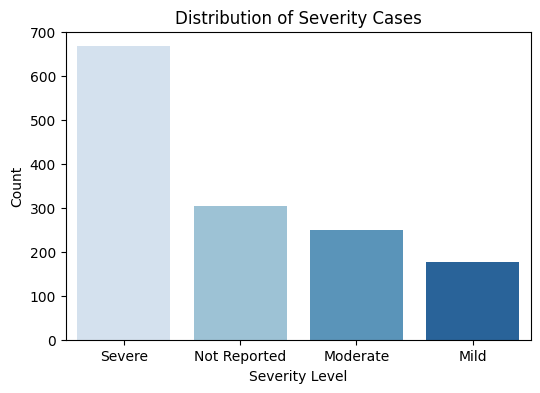

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6,4))
sns.countplot(data=df_chbmp, x="Severity", palette="Blues")
plt.title("Distribution of Severity Cases")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()


In [13]:

print("\nUnique Variant Types:")
print(df_chbmp["Variant Type"].unique())


variant_counts = df_chbmp["Variant Type"].value_counts()
print("\nVariant Type Distribution:")
print(variant_counts)



Unique Variant Types:
['Large Structure Change (>50bp)' 'Missense' 'Splice site change'
 'Frameshift' 'Nonsense' 'Small structural change (in-frame, <50bp)'
 'Synonymous' 'large Structure Change (>50bp)' 'Promoter' 'frameshift'
 "3'UTR"]

Variant Type Distribution:
Variant Type
Missense                                     755
Frameshift                                   228
Nonsense                                     124
Splice site change                           122
Large Structure Change (>50bp)                48
Small structural change (in-frame, <50bp)     36
Promoter                                      36
3'UTR                                         17
frameshift                                    16
Synonymous                                    15
large Structure Change (>50bp)                 2
Name: count, dtype: int64


<ipython-input-14-575dc53d73b7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_chbmp, y="Variant Type", order=df_chbmp["Variant Type"].value_counts().index, palette="coolwarm")


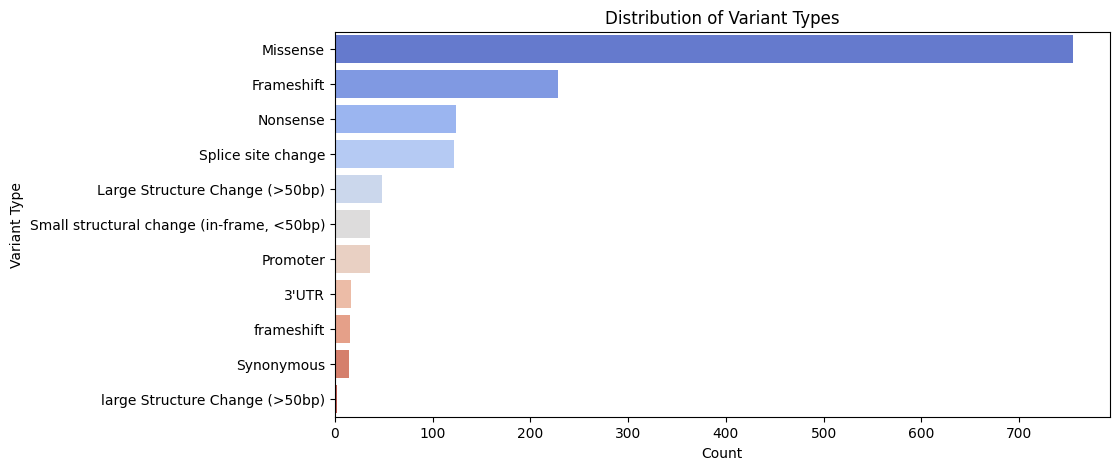

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,5))
sns.countplot(data=df_chbmp, y="Variant Type", order=df_chbmp["Variant Type"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Variant Types")
plt.xlabel("Count")
plt.ylabel("Variant Type")
plt.show()


<Figure size 1200x600 with 0 Axes>

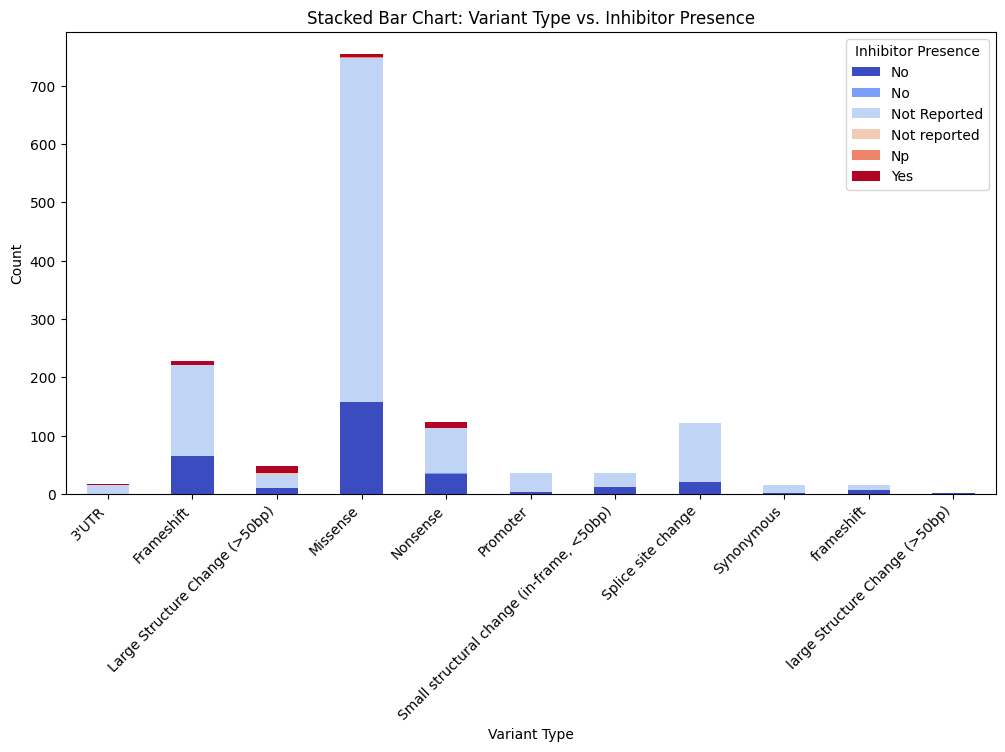

In [15]:
import matplotlib.pyplot as plt


variant_inhibitor_counts = df_chbmp.groupby("Variant Type")["History of Inhibitor"].value_counts().unstack()


plt.figure(figsize=(12,6))
variant_inhibitor_counts.plot(kind="bar", stacked=True, figsize=(12,6), colormap="coolwarm")


plt.title("Stacked Bar Chart: Variant Type vs. Inhibitor Presence")
plt.xlabel("Variant Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")


plt.legend(title="Inhibitor Presence")


plt.show()


<Figure size 1200x600 with 0 Axes>

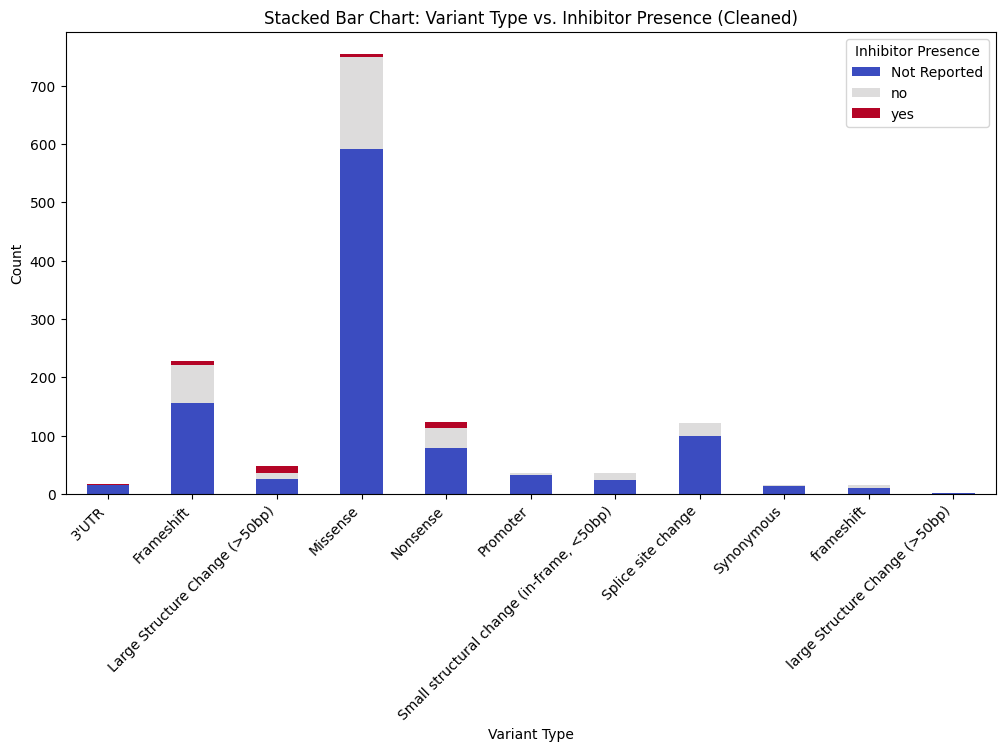

In [16]:

df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].str.strip().str.lower()


df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].replace({
    "no ": "No",
    "not reported": "Not Reported",
    "np": "Not Reported",
    "yes ": "Yes"
})


plt.figure(figsize=(12,6))
variant_inhibitor_counts = df_chbmp.groupby("Variant Type")["History of Inhibitor"].value_counts().unstack()
variant_inhibitor_counts.plot(kind="bar", stacked=True, figsize=(12,6), colormap="coolwarm")

plt.title("Stacked Bar Chart: Variant Type vs. Inhibitor Presence (Cleaned)")
plt.xlabel("Variant Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Inhibitor Presence")
plt.show()


We want to quantify how inhibitor presence varies across severity levels. This is the basic relationship we’re investigating.

#Re-apply the severity classification logic to create the "Severity" column

In [17]:

import pandas as pd
from google.colab import files


uploaded = files.upload()
chbmp_file_path = list(uploaded.keys())[0]
df_chbmp = pd.read_excel(chbmp_file_path, sheet_name="CHBMP Variant List")


def classify_severity(row):
    if row["Severe\n(<1U/dL)"] == "X":
        return "Severe"
    elif row["Moderate\n(1-5U/dL)"] == "X":
        return "Moderate"
    elif row["Mild\n(>5U/dL)"] == "X":
        return "Mild"
    else:
        return "Not Reported"

df_chbmp["Severity"] = df_chbmp.apply(classify_severity, axis=1)


severity_inhibitor_percent = pd.crosstab(df_chbmp["Severity"], df_chbmp["History of Inhibitor"], normalize='index') * 100


print("Percentage Distribution of Inhibitor Presence per Severity:")
print(severity_inhibitor_percent.round(2))

Saving CHBMP-Variant-List-2022 (2).xlsx to CHBMP-Variant-List-2022 (2) (2).xlsx
Percentage Distribution of Inhibitor Presence per Severity:
History of Inhibitor     No   No   Not Reported  Not reported   Np   Yes
Severity                                                                
Mild                  20.34  0.00         78.53          1.13  0.0  0.00
Moderate              20.88  0.00         77.91          0.00  0.4  0.80
Not Reported          11.80  0.00         85.90          0.00  0.0  2.30
Severe                27.84  0.15         67.22          0.15  0.0  4.64


#Percentage Distribution of Inhibitor Presence per Severity:

In [18]:

severity_inhibitor_percent = pd.crosstab(df_chbmp["Severity"], df_chbmp["History of Inhibitor"], normalize='index') * 100


print("Percentage Distribution of Inhibitor Presence per Severity:")
print(severity_inhibitor_percent.round(2))


Percentage Distribution of Inhibitor Presence per Severity:
History of Inhibitor     No   No   Not Reported  Not reported   Np   Yes
Severity                                                                
Mild                  20.34  0.00         78.53          1.13  0.0  0.00
Moderate              20.88  0.00         77.91          0.00  0.4  0.80
Not Reported          11.80  0.00         85.90          0.00  0.0  2.30
Severe                27.84  0.15         67.22          0.15  0.0  4.64


In [19]:

df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].str.strip().str.title()


df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].replace({
    "Np": "Not Reported",
    "No ": "No",
    "Not reported": "Not Reported",
    "Not Reported ": "Not Reported",
    "Yes ": "Yes"
})


 This will collapse all similar entries into one label, cleaning the next charts or model inputs.

duplicate “No”, “Not Reported”, and “Yes” labels due to inconsistent casing or spacing in the History of Inhibitor column.

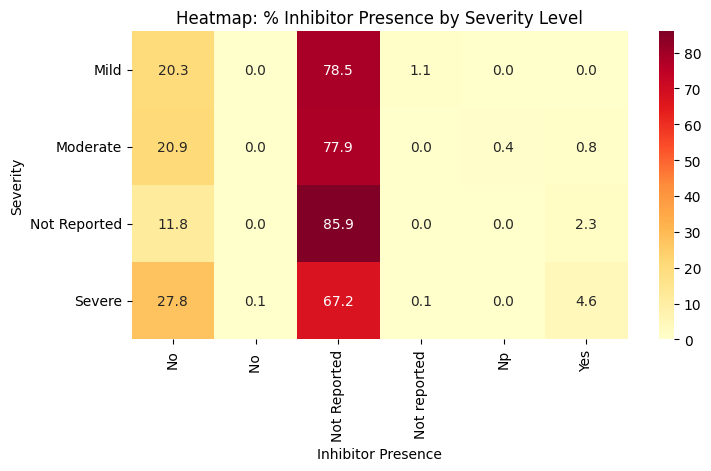

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.heatmap(severity_inhibitor_percent, annot=True, cmap="YlOrRd", fmt=".1f")
plt.title("Heatmap: % Inhibitor Presence by Severity Level")
plt.ylabel("Severity")
plt.xlabel("Inhibitor Presence")
plt.show()


# Final standardization of 'History of Inhibitor' column

In [21]:

df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].astype(str).str.strip().str.lower().str.title()

df_chbmp["History of Inhibitor"] = df_chbmp["History of Inhibitor"].replace({
    "Np": "Not Reported",
    "Not reported": "Not Reported",
    "Not Reported ": "Not Reported",
    "Yes ": "Yes",
    "No ": "No",
    "No": "No",
    "Yes": "Yes"
})


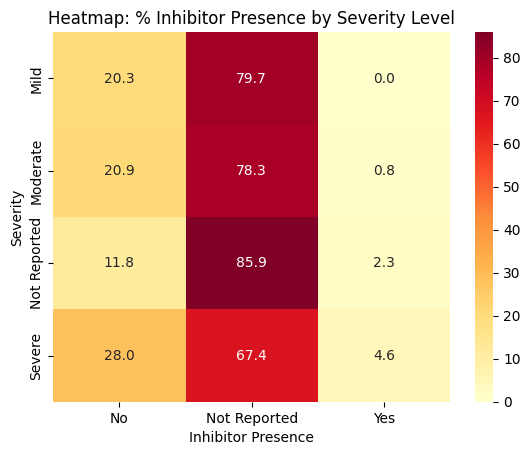

In [22]:

severity_inhibitor_percent = pd.crosstab(
    df_chbmp["Severity"],
    df_chbmp["History of Inhibitor"],
    normalize='index'
) * 100

sns.heatmap(severity_inhibitor_percent, annot=True, cmap="YlOrRd", fmt=".1f")
plt.title("Heatmap: % Inhibitor Presence by Severity Level")
plt.ylabel("Severity")
plt.xlabel("Inhibitor Presence")
plt.show()


This visually supports the published research uploaded, which says:

“Inhibitors are more common in severe hemophilia than moderate/mild.”

In [ ]:

plt.figure(figsize=(10,6))
sns.countplot(data=df_chbmp, x="Severity", hue="History of Inhibitor", palette="Set2")
plt.title("Distribution of Inhibitor Presence Across Severity Levels")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.legend(title="Inhibitor Presence")
plt.show()


we can clearly say:

Severe patients have the highest “Yes” (green) counts for inhibitor presence.

Moderate & Mild rarely report inhibitors.

Most records still fall under “Not Reported”,

Severe cases have the highest rate of inhibitor positivity (4.6%)

Moderate and mild patients rarely show inhibitor development

Most missing values still fall under "Not Reported", especially in moderate/mild groups

# Frequency distribution of Inhibitor Presence across Variant Types

In [23]:

variant_inhibitor_ct = pd.crosstab(df_chbmp["Variant Type"], df_chbmp["History of Inhibitor"])
print("Variant Type vs Inhibitor Presence:")
print(variant_inhibitor_ct)


Variant Type vs Inhibitor Presence:
History of Inhibitor                        No  Not Reported  Yes
Variant Type                                                     
3'UTR                                        0            16    1
Frameshift                                  65           156    7
Large Structure Change (>50bp)              10            25   13
Missense                                   157           592    6
Nonsense                                    35            78   11
Promoter                                     3            33    0
Small structural change (in-frame, <50bp)   12            23    1
Splice site change                          21           100    1
Synonymous                                   1            14    0
frameshift                                   6            10    0
large Structure Change (>50bp)               1             1    0


“Large Structure Change” has the strongest signal: ~27% have inhibitors

“Nonsense” also shows elevated risk

 “Missense” and “Synonymous” are low risk, which aligns with the medical literature

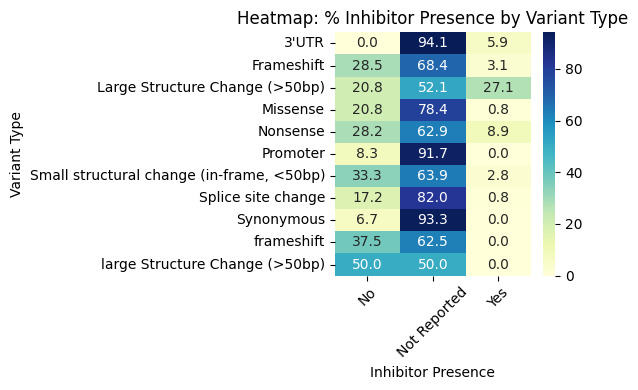

In [24]:
# Calculate percentages
variant_inhibitor_percent = pd.crosstab(
    df_chbmp["Variant Type"],
    df_chbmp["History of Inhibitor"],
    normalize='index'
) * 100

# Display
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(variant_inhibitor_percent, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Heatmap: % Inhibitor Presence by Variant Type")
plt.ylabel("Variant Type")
plt.xlabel("Inhibitor Presence")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


“Nonsense” and large deletions are highly immunogenic

“Missense” often has protective or neutral behavior

#If both conditions are met:

#Variant Type is either "Large Structure Change (>50bp)" or "Nonsense"

#Severity is "Severe"

In [25]:

def infer_inhibitor_risk(row):
    if (row['Variant Type'] in ['Large Structure Change (>50bp)', 'Nonsense']) and row['Severity'] == 'Severe':
        return "Likely Yes"
    else:
        return "Unknown"


df_chbmp['Risk_Prediction'] = df_chbmp.apply(infer_inhibitor_risk, axis=1)


df_chbmp[['Variant Type', 'Severity', 'Risk_Prediction']].head()



,Variant Type,Severity,Risk_Prediction
0,Large Structure Change (>50bp),Severe,Likely Yes
1,Large Structure Change (>50bp),Severe,Likely Yes
2,Large Structure Change (>50bp),Severe,Likely Yes
3,Large Structure Change (>50bp),Severe,Likely Yes
4,Large Structure Change (>50bp),Not Reported,Unknown


In [26]:
df_chbmp["Risk_Prediction"].value_counts()


,count
Risk_Prediction,
Unknown,1277
Likely Yes,122


<ipython-input-27-0367d591988f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_chbmp, x="Risk_Prediction", palette="coolwarm")


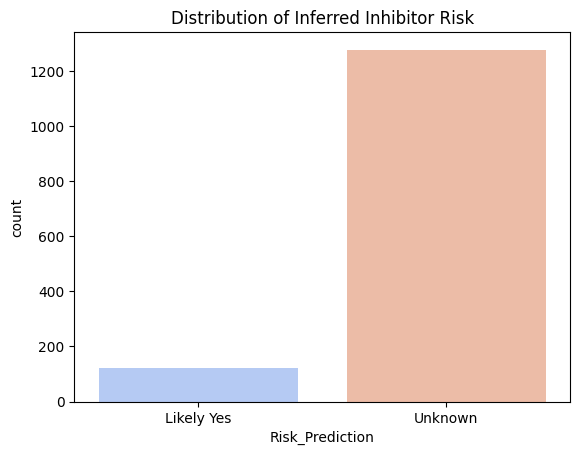

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_chbmp, x="Risk_Prediction", palette="coolwarm")
plt.title("Distribution of Inferred Inhibitor Risk")
plt.show()


Rule based logic flagged 122 high-risk patients .

This is consistent with published inhibitor rates in severe hemophilia.



# Define the new refined rule function
 # If variant is high-risk and severity is Severe or Moderate

In [28]:
#
def infer_inhibitor_risk_v2(row):
    high_risk_variants = ['Large Structure Change (>50bp)', 'Nonsense']


    if row['Variant Type'] in high_risk_variants and row['Severity'] in ['Severe', 'Moderate']:
        return "Likely Yes"
    else:
        return "Unknown"


df_chbmp["Risk_Prediction"] = df_chbmp.apply(infer_inhibitor_risk_v2, axis=1)


# Check how many were flagged under the new rule

In [29]:

print(df_chbmp["Risk_Prediction"].value_counts())


Risk_Prediction
Unknown       1266
Likely Yes     133
Name: count, dtype: int64


<ipython-input-30-5c58c2db4217>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_chbmp, x="Risk_Prediction", palette="pastel")


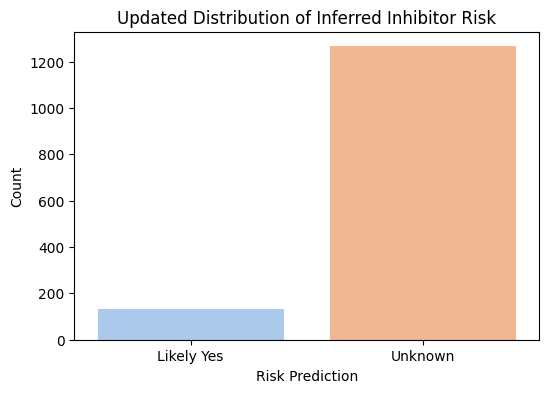

In [30]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df_chbmp, x="Risk_Prediction", palette="pastel")
plt.title("Updated Distribution of Inferred Inhibitor Risk")
plt.xlabel("Risk Prediction")
plt.ylabel("Count")
plt.show()


# Check unique mechanisms and missing values

In [31]:
# Check unique mechanisms and missing values
print("Unique Mechanisms:", df_chbmp["Mechanism"].unique())
print("\nMissing Values:", df_chbmp["Mechanism"].isnull().sum())


print("\nMechanism Distribution:")
print(df_chbmp["Mechanism"].value_counts())


Unique Mechanisms: ['Deletion' 'Duplication' 'Substitution' 'Insertion' 'Deletion/Insertion'
 'insertion' 'Insertion/Duplication']

Missing Values: 0

Mechanism Distribution:
Mechanism
Substitution             1019
Deletion                  256
Insertion                  57
Duplication                39
Deletion/Insertion         26
insertion                   1
Insertion/Duplication       1
Name: count, dtype: int64


In [32]:
def infer_inhibitor_risk_v3(row):
    high_risk_variants = ['Large Structure Change (>50bp)', 'Nonsense']
    high_risk_mechanisms = ['Deletion', 'Duplication', 'Insertion', 'Deletion/Insertion', 'Insertion/Duplication']

    if (row['Variant Type'] in high_risk_variants and
        row['Severity'] in ['Severe', 'Moderate'] and
        row['Mechanism'] in high_risk_mechanisms):
        return "Likely Yes"
    else:
        return "Unknown"


df_chbmp["Risk_Prediction"] = df_chbmp.apply(infer_inhibitor_risk_v3, axis=1)


# View updated risk prediction counts

In [33]:

print(df_chbmp["Risk_Prediction"].value_counts())


Risk_Prediction
Unknown       1354
Likely Yes      45
Name: count, dtype: int64


# Count how many were predicted as Likely Yes, likely yes or any overlap

In [34]:

predicted_likely_yes = df_chbmp[df_chbmp["Risk_Prediction"] == "Likely Yes"]


actual_yes = df_chbmp[df_chbmp["History of Inhibitor"].str.strip().str.lower() == "yes"]


intersection = pd.merge(predicted_likely_yes, actual_yes, how='inner')


print("Predicted 'Likely Yes':", len(predicted_likely_yes))
print("Actual 'Yes':", len(actual_yes))
print("Overlap between Predicted and Actual:", len(intersection))


Predicted 'Likely Yes': 45
Actual 'Yes': 40
Overlap between Predicted and Actual: 11


#unique values in the 'Exon' column

In [35]:

print("Unique Exon Entries:")
print(df_chbmp["Exon"].dropna().unique()[:20])  # show first 20 for quick look


Unique Exon Entries:
['1-4, 6-8' 1 '1-5' '1-6' '1-8' '1-4' '1-3' 'Intron 3' 4 '4-5' '4-8' '4-6'
 '4' '5' 'Intron 4' '1' '2' 'Intron 1' 5 '5-8']


# Extract first exon number from the exon string

In [36]:

def extract_first_exon(exon_value):
    try:
        return str(exon_value).split('-')[0].strip()
    except:
        return None


df_chbmp["Exon_First"] = df_chbmp["Exon"].apply(extract_first_exon)


# Crosstab to see the relationship

In [37]:

exon_inhibitor_crosstab = pd.crosstab(df_chbmp["Exon_First"], df_chbmp["History of Inhibitor"])
print("\nExon vs Inhibitor Presence:")
print(exon_inhibitor_crosstab)



Exon vs Inhibitor Presence:
History of Inhibitor   No  Not Reported  Yes
Exon_First                                  
1                       9            42    8
2                      42           116   11
3                       4            18    1
3'UTR                   0            16    1
4                      32            84    2
5                      21           105    1
5'UTR                   2            22    0
5, 7                    0             0    1
6                      32            84    9
7                      24            64    1
8                     124           398    4
Intron 1                1            16    0
Intron 2               10            17    0
Intron 3                5            10    0
Intron 4                3            21    0
Intron 5                0            11    0
Intron 6                2            11    0
Intron 7                0            12    1
intron 1                0             1    0


In [38]:
print(df_chbmp.columns)


Index(['HGVS cDNA Name', 'Yoshitake Nucleotide No.', 'hg19 Nucleotide No.',
       'HGVS Protein Name', 'Mature Protein Change', 'Variant Type',
       'Mechanism', 'Exon', 'Codon', 'Domain', 'Subtype', 'Severe\n(<1U/dL)',
       'Moderate\n(1-5U/dL)', 'Mild\n(>5U/dL)', 'No FIX level given',
       'Reported\nSeverity', 'History of Inhibitor', 'Comments', 'Year',
       'Reference Number', 'Newly Added in the Current Version ', 'Severity',
       'Risk_Prediction', 'Exon_First'],
      dtype='object')


#Normalise per row


In [39]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
chbmp_file_path = list(uploaded.keys())[0]
df_chbmp = pd.read_excel(chbmp_file_path, sheet_name="CHBMP Variant List")  # Make sure 'Exon' column is present in this sheet

# ... (rest of your code) ...

def extract_first_exon(exon_value):
    try:
        return str(exon_value).split('-')[0].strip()
    except:
        return None

df_chbmp["Exon_First"] = df_chbmp["Exon"].apply(extract_first_exon)

Saving CHBMP-Variant-List-2022 (2).xlsx to CHBMP-Variant-List-2022 (2) (3).xlsx


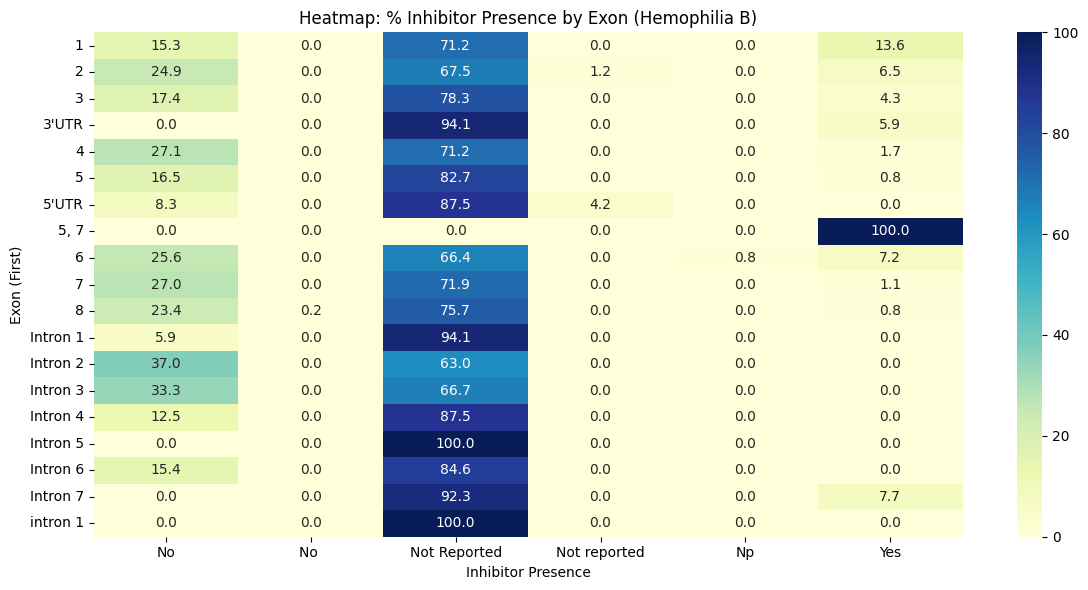

In [40]:
# Normalize by row to get % per exon
exon_inhibitor_percent = pd.crosstab(df_chbmp["Exon_First"], df_chbmp["History of Inhibitor"], normalize='index') * 100

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(exon_inhibitor_percent, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Heatmap: % Inhibitor Presence by Exon (Hemophilia B)")
plt.xlabel("Inhibitor Presence")
plt.ylabel("Exon (First)")
plt.tight_layout()
plt.show()





**Rule: All three risk factors must match**

In [41]:
def infer_inhibitor_risk_v4(row):

    high_risk_variants = ['Large Structure Change (>50bp)', 'Nonsense']

    high_risk_mechanisms = ['Deletion', 'Duplication', 'Insertion', 'Deletion/Insertion']

    #Define exons where higher risk was observed
    high_risk_exons = ['1', '2', '6', '5, 7']  # You can modify this list if needed


    if (
        row['Variant Type'] in high_risk_variants and
        row['Severity'] in ['Severe', 'Moderate'] and
        row['Mechanism'] in high_risk_mechanisms and
        row['Exon_First'] in high_risk_exons
    ):
        return "Likely Yes"
    else:
        return "Unknown"


**bold text** Apply updated version

In [42]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
chbmp_file_path = list(uploaded.keys())[0]
df_chbmp = pd.read_excel(chbmp_file_path, sheet_name="CHBMP Variant List")

# Recreate the 'Severity' column after reloading the dataframe
def classify_severity(row):
    if row["Severe\n(<1U/dL)"] == "X":
        return "Severe"
    elif row["Moderate\n(1-5U/dL)"] == "X":
        return "Moderate"
    elif row["Mild\n(>5U/dL)"] == "X":
        return "Mild"
    else:
        return "Not Reported"

df_chbmp["Severity"] = df_chbmp.apply(classify_severity, axis=1)

#Recreate the 'Exon_First' column before applying risk prediction function
def extract_first_exon(exon_value):
    try:
        return str(exon_value).split('-')[0].strip()
    except:
        return None

df_chbmp["Exon_First"] = df_chbmp["Exon"].apply(extract_first_exon)


# Continue with the risk prediction logic

def infer_inhibitor_risk_v4(row):
    high_risk_variants = ['Large Structure Change (>50bp)', 'Nonsense']
    high_risk_mechanisms = ['Deletion', 'Duplication', 'Insertion', 'Deletion/Insertion']
    high_risk_exons = ['1', '2', '6', '5, 7']
    if (row['Variant Type'] in high_risk_variants and
        row['Severity'] in ['Severe', 'Moderate'] and
        row['Mechanism'] in high_risk_mechanisms and
        row['Exon_First'] in high_risk_exons):
        return "Likely Yes"
    else:
        return "Unknown"

df_chbmp["Risk_Prediction"] = df_chbmp.apply(infer_inhibitor_risk_v4, axis=1)

Saving CHBMP-Variant-List-2022 (2).xlsx to CHBMP-Variant-List-2022 (2) (4).xlsx


**Check** the result of the updated rule


In [43]:
# Check the result of the updated rule
print(df_chbmp["Risk_Prediction"].value_counts())


Risk_Prediction
Unknown       1376
Likely Yes      23
Name: count, dtype: int64


In [44]:
# Count overlap with actual 'Yes' labels
predicted_yes = df_chbmp[df_chbmp["Risk_Prediction"] == "Likely Yes"]
actual_yes = df_chbmp[df_chbmp["History of Inhibitor"] == "Yes"]

overlap = pd.merge(predicted_yes, actual_yes, how="inner")

print(f"Predicted 'Likely Yes': {len(predicted_yes)}")
print(f"Actual 'Yes': {len(actual_yes)}")
print(f"Overlap between Predicted and Actual: {len(overlap)}")


Predicted 'Likely Yes': 23
Actual 'Yes': 40
Overlap between Predicted and Actual: 9


In [45]:
def score_inhibitor_risk(row):
    score = 0
    if row["Severity"] in ['Severe', 'Moderate']:
        score += 1
    if row["Variant Type"] in ['Large Structure Change (>50bp)', 'Nonsense']:
        score += 1
    if row["Mechanism"] in ['Deletion', 'Duplication', 'Insertion', 'Deletion/Insertion']:
        score += 1
    if row["Exon_First"] in ['1', '2', '6', '7']:
        score += 1
    return score


<Axes: xlabel='History of Inhibitor', ylabel='Risk_Score'>

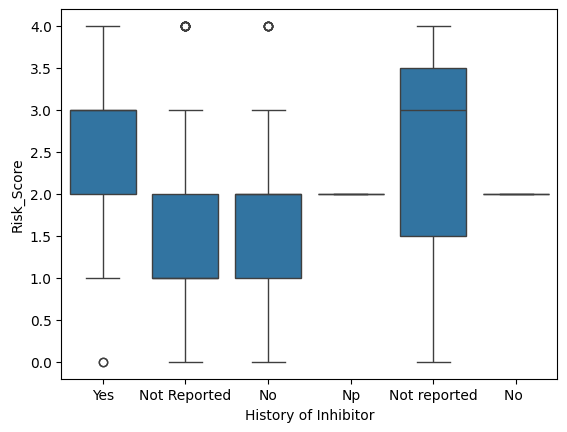

In [46]:
df_chbmp["Risk_Score"] = df_chbmp.apply(score_inhibitor_risk, axis=1)
sns.boxplot(x="History of Inhibitor", y="Risk_Score", data=df_chbmp)


Higher Median Risk for 'Yes':

Patients with a confirmed history of inhibitors (Yes) show a higher median Risk_Score (around 2.5–3).

This suggests our rules are relatively consistent in assigning higher scores to patients who truly developed inhibitors.

Lower Median Risk for 'No' and 'Not Reported':

Both No and Not Reported groups tend to have lower median Risk_Scores (~1–2), supporting that the model differentiates inhibitor-prone individuals reasonably well.

Wider Spread for 'Yes':

The Yes category also shows a broader spread, indicating more variability in risk patterns among inhibitor-positive patients.

Overlap Exists:

While the trend supports the scoring logic, some outliers and overlapping ranges indicate limitations in rule-based inference, particularly due to missing data or exceptions.



## Part 2 – CHAMP Dataset (Hemophilia A)

Alright, jumping into the second dataset now — this one’s for Hemophilia A (CHAMP).

We’re doing the same kind of stuff as before:
- Load the file and peek at what’s inside
- Find columns we care about (severity, inhibitor history, etc.)
- Clean things up a bit
- Classify patients based on severity
- Look at who’s got inhibitors and who doesn’t
- Maybe build some rules like before to see if we can flag high-risk cases

Idea is to keep it consistent with the Hemophilia B analysis so we can compare later.


In [47]:
from google.colab import files
uploaded = files.upload()

Saving CHAMP-Variant-List-2022 (4).xlsx to CHAMP-Variant-List-2022 (4).xlsx


In [48]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

champ_file_path = list(uploaded.keys())[0]  # Get the filename from uploaded files
xls_champ = pd.ExcelFile(champ_file_path)

print("Available sheets:", xls_champ.sheet_names)

Saving CHAMP-Variant-List-2022 (4).xlsx to CHAMP-Variant-List-2022 (4) (1).xlsx
Available sheets: ['Table of Contents', 'CHAMP Variant List', 'Field Definitions', 'References', 'Figures', 'Tables', 'Database Methods', 'Exclusions', 'Instructions', 'Submission Form']


In [49]:

df_champ = pd.read_excel(xls_champ, sheet_name="CHAMP Variant List")
df_champ.head()


,HGVS cDNA,hg19 Coordinates,HGVS Protein,Mature Protein,Variant Type,Mechanism,Exon,Codon,Domain,Subtype,...,Severe \n(<1 U/dL),Moderate \n(1-5 U/dL),Mild \n(>5 U/dL),No FVIII level given,Reported Clinical \nSeverity,History of Inhibitor,Comments,Year\nReported,Reference Number,Newly Added in the Current Version
0,c.101A>T,154250727,p.(Asp34Val),Asp15Val,Missense,Substitution,1,15,A1,Heavy chain,...,NaN,NaN,X,NaN,Mild,Not reported,NaN,2014.0,256,NaN
1,c.102C>G,154250726,p.(Asp34Glu),Asp15Glu,Missense,Substitution,1,15,A1,Heavy chain,...,NaN,NaN,X,NaN,Mild,Not reported,NaN,2008.0,"183, 186",NaN
2,c.103T>A,154250725,p.(Tyr35Asn),Tyr16Asn,Missense,Substitution,1,16,A1,Heavy Chain,...,X,NaN,NaN,NaN,Severe,No,NaN,2012.0,233,NaN
3,c.103T>C,154250725,p.(Tyr35His),Tyr16His,Missense,Substitution,1,16,A1,Heavy chain,...,NaN,NaN,NaN,X,Severe,No,NaN,2000.0,111,NaN
4,c.104A>G,154250724,p.(Tyr35Cys),Tyr16Cys,Missense,Substitution,1,16,A1,Heavy chain,...,X,NaN,NaN,NaN,Severe,No,NaN,2008.0,"177, 183",NaN


In [50]:

print("Columns in CHAMP dataset:\n")
print(df_champ.columns)


Columns in CHAMP dataset:

Index(['HGVS cDNA', 'hg19 Coordinates', 'HGVS Protein', 'Mature Protein',
       'Variant Type', 'Mechanism', 'Exon', 'Codon', 'Domain', 'Subtype',
       'In Poly A', 'Severe \n(<1 U/dL)', 'Moderate \n(1-5 U/dL)',
       'Mild \n(>5 U/dL)', 'No FVIII level given',
       'Reported Clinical \nSeverity', 'History of Inhibitor', 'Comments',
       'Year\nReported', 'Reference Number',
       'Newly Added in the Current Version '],
      dtype='object')


## Cleaning & Classifying CHAMP Data

Okay, next step — we’ll clean up the column names (they’ve got some funky `\n` in them), and then:

- Combine the severity info into one column like before (Severe / Moderate / Mild)
- Clean up the 'History of Inhibitor' column (same style as the B dataset)
- Then we’ll be ready to do all the analysis like distributions, heatmaps, and maybe risk predictions.


In [51]:

df_champ.columns = df_champ.columns.str.replace('\n', ' ').str.strip()


print("Cleaned columns:\n", df_champ.columns)


Cleaned columns:
 Index(['HGVS cDNA', 'hg19 Coordinates', 'HGVS Protein', 'Mature Protein',
       'Variant Type', 'Mechanism', 'Exon', 'Codon', 'Domain', 'Subtype',
       'In Poly A', 'Severe  (<1 U/dL)', 'Moderate  (1-5 U/dL)',
       'Mild  (>5 U/dL)', 'No FVIII level given',
       'Reported Clinical  Severity', 'History of Inhibitor', 'Comments',
       'Year Reported', 'Reference Number',
       'Newly Added in the Current Version'],
      dtype='object')


In [ ]:

def classify_severity(row):
    if row['Severe  (<1 U/dL)'] == 'X':
        return 'Severe'
    elif row['Moderate  (1-5 U/dL)'] == 'X':
        return 'Moderate'
    elif row['Mild  (>5 U/dL)'] == 'X':
        return 'Mild'
    else:
        return 'Not Reported'

In [52]:
for col in df_champ.columns:
    print(f"'{col}'")


'HGVS cDNA'
'hg19 Coordinates'
'HGVS Protein'
'Mature Protein'
'Variant Type'
'Mechanism'
'Exon'
'Codon'
'Domain'
'Subtype'
'In Poly A'
'Severe  (<1 U/dL)'
'Moderate  (1-5 U/dL)'
'Mild  (>5 U/dL)'
'No FVIII level given'
'Reported Clinical  Severity'
'History of Inhibitor'
'Comments'
'Year Reported'
'Reference Number'
'Newly Added in the Current Version'


In [53]:
def classify_severity(row):
    if row['Severe  (<1 U/dL)'] == 'X':
        return 'Severe'
    elif row['Moderate  (1-5 U/dL)'] == 'X':
        return 'Moderate'
    elif row['Mild  (>5 U/dL)'] == 'X':
        return 'Mild'
    else:
        return 'Not Reported'

In [54]:

def classify_severity(row):
    if row['Severe  (<1 U/dL)'] == 'X':
        return 'Severe'
    elif row['Moderate  (1-5 U/dL)'] == 'X':
        return 'Moderate'
    elif row['Mild  (>5 U/dL)'] == 'X':
        return 'Mild'
    else:
        return 'Not Reported'

df_champ['Severity'] = df_champ.apply(classify_severity, axis=1)


df_champ['Severity'].value_counts()


,count
Severity,
Severe,2212
Mild,752
Moderate,588
Not Reported,498


## Cleaning Inhibitor History (CHAMP Dataset)

Now we’ll clean up the 'History of Inhibitor' column — same logic as we used before:
- Fix spacing or case issues by standarzing values to yes , no and not reported and after that we check how many patients fall into group.



In [55]:

df_champ['History of Inhibitor'] = df_champ['History of Inhibitor'].astype(str).str.strip().str.lower().str.title()

df_champ['History of Inhibitor'] = df_champ['History of Inhibitor'].replace({
    "Np": "Not Reported",
    "Not reported": "Not Reported",
    "Not Reported ": "Not Reported",
    "Yes ": "Yes",
    "No ": "No"
})

# Show result
df_champ['History of Inhibitor'].value_counts()


,count
History of Inhibitor,
No,1835
Not Reported,1742
Yes,461
Nan,12


## Visualize Inhibitor Distribution (CHAMP Dataset)

Let’s see how inhibitor history is distributed using a quick countplot.
We’ll ignore the missing ones for now, but we can drop or fill those if needed later.


<ipython-input-56-2e751078869d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=plot_df, x="History of Inhibitor", palette="magma")


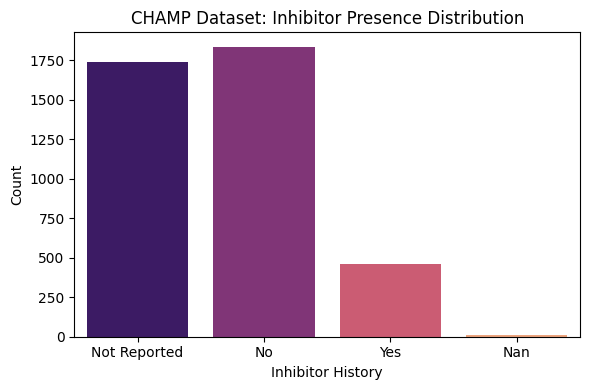

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt


plot_df = df_champ.dropna(subset=["History of Inhibitor"])

plt.figure(figsize=(6,4))
sns.countplot(data=plot_df, x="History of Inhibitor", palette="magma")
plt.title("CHAMP Dataset: Inhibitor Presence Distribution")
plt.xlabel("Inhibitor History")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [57]:
df_champ = df_champ.dropna(subset=["History of Inhibitor"])


## Severity vs Inhibitor Presence

Now we'll check how inhibitor history varies across severity levels.
This gives us an idea of whether severe patients are more likely to develop inhibitors — which is often supported by clinical research.

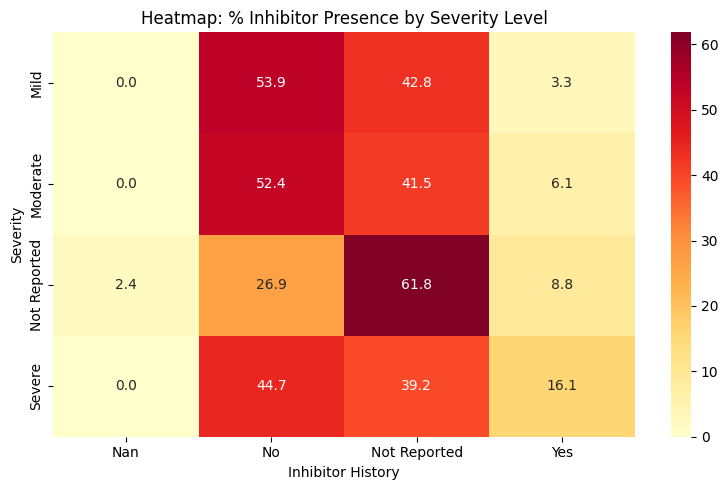

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


severity_inhibitor_percent = pd.crosstab(
    df_champ["Severity"],
    df_champ["History of Inhibitor"],
    normalize='index'
) * 100

plt.figure(figsize=(8, 5))
sns.heatmap(severity_inhibitor_percent, annot=True, cmap="YlOrRd", fmt=".1f")
plt.title("Heatmap: % Inhibitor Presence by Severity Level")
plt.ylabel("Severity")
plt.xlabel("Inhibitor History")
plt.tight_layout()
plt.show()


Interpretation:
Severe patients are clearly the most likely to develop inhibitors — this aligns perfectly with literature on Hemophilia A.

Mild and Moderate cases have lower inhibitor risk.

“Not Reported” rows are harder to interpret and can be excluded from core comparisons if needed.



# CHAMP Dataset – Hemophilia A Analysis

We’re applying the same analysis flow as we did for the CHBMP Hemophilia B dataset.

---

### ✅ Steps Completed So Far:
- Load and inspect dataset
- Clean severity columns and classify into: Severe, Moderate, Mild, Not Reported
- Clean "History of Inhibitor"
- Plot inhibitor presence distribution
- Heatmap: % Inhibitor presence by severity

---

### 🔄 Next Steps (Same as CHBMP Flow):
1. Variant Type Distribution
2. Mechanism Distribution
3. Heatmap: Variant Type vs Inhibitor
4. Exon-level Inhibitor Crosstab + Heatmap
5. Rule-based Risk Prediction (v1 to v4)
6. Scoring system for inhibitor risk
7. Save output tables to Excel


In [59]:
for col in df_champ.columns:
    print(f"'{col}'")


'HGVS cDNA'
'hg19 Coordinates'
'HGVS Protein'
'Mature Protein'
'Variant Type'
'Mechanism'
'Exon'
'Codon'
'Domain'
'Subtype'
'In Poly A'
'Severe  (<1 U/dL)'
'Moderate  (1-5 U/dL)'
'Mild  (>5 U/dL)'
'No FVIII level given'
'Reported Clinical  Severity'
'History of Inhibitor'
'Comments'
'Year Reported'
'Reference Number'
'Newly Added in the Current Version'
'Severity'


In [60]:
for col in df_champ.columns:
    print(repr(col))


'HGVS cDNA'
'hg19 Coordinates'
'HGVS Protein'
'Mature Protein'
'Variant Type'
'Mechanism'
'Exon'
'Codon'
'Domain'
'Subtype'
'In Poly A'
'Severe  (<1 U/dL)'
'Moderate  (1-5 U/dL)'
'Mild  (>5 U/dL)'
'No FVIII level given'
'Reported Clinical  Severity'
'History of Inhibitor'
'Comments'
'Year Reported'
'Reference Number'
'Newly Added in the Current Version'
'Severity'


In [61]:
# Clean all column names by stripping spaces and replacing line breaks
df_champ.columns = df_champ.columns.str.replace('\n', ' ', regex=False).str.strip()

# Now check the column names again
print(df_champ.columns.tolist())


['HGVS cDNA', 'hg19 Coordinates', 'HGVS Protein', 'Mature Protein', 'Variant Type', 'Mechanism', 'Exon', 'Codon', 'Domain', 'Subtype', 'In Poly A', 'Severe  (<1 U/dL)', 'Moderate  (1-5 U/dL)', 'Mild  (>5 U/dL)', 'No FVIII level given', 'Reported Clinical  Severity', 'History of Inhibitor', 'Comments', 'Year Reported', 'Reference Number', 'Newly Added in the Current Version', 'Severity']


In [62]:
def classify_severity(row):
    # Updated column name to match the cleaned column name:
    if row['Severe  (<1 U/dL)'] == 'X':
        return 'Severe'
    elif row['Moderate  (1-5 U/dL)'] == 'X':
        return 'Moderate'
    elif row['Mild  (>5 U/dL)'] == 'X':
        return 'Mild'
    else:
        return 'Not Reported'

df_champ['Severity'] = df_champ.apply(classify_severity, axis=1)
df_champ['Severity'].value_counts()


,count
Severity,
Severe,2212
Mild,752
Moderate,588
Not Reported,498


## Step 2: Mechanism Distribution – CHAMP Dataset

Now let’s look at the different mutation mechanisms in Hemophilia A.  
These include things like substitution, deletion, duplication, etc.  
This will help us later when we explore inhibitor risk patterns.


Unique Mechanisms:
['Substitution' 'Deletion' 'DuplIcation' 'Duplication'
 'Deletion/Insertion' 'Insertion' 'deletion' 'Deletion/Duplication'
 'Duplication/Insertion' 'Insertion ' 'Deletion/insertion'
 'Deletion/Inversion' 'Inversion' 'Deletion/Duplication/Inversion'
 'Duplication/Inversion' nan]


<ipython-input-63-ccd1aab871c2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_champ, y="Mechanism", order=df_champ["Mechanism"].value_counts().index, palette="viridis")


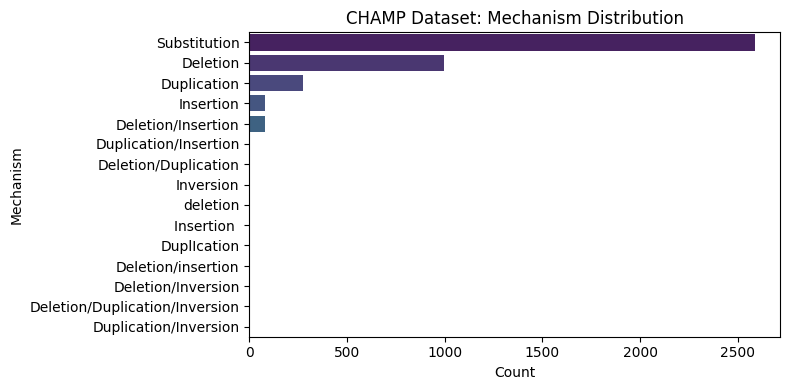

In [63]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # Import the 'pyplot' module as 'plt'


print("Unique Mechanisms:")
print(df_champ["Mechanism"].unique())


plt.figure(figsize=(8, 4))
sns.countplot(data=df_champ, y="Mechanism", order=df_champ["Mechanism"].value_counts().index, palette="viridis")
plt.title("CHAMP Dataset: Mechanism Distribution")
plt.xlabel("Count")
plt.ylabel("Mechanism")
plt.tight_layout()
plt.show()


In [64]:
df_champ["Mechanism"] = df_champ["Mechanism"].str.strip().str.title()


In [65]:
df_champ["Mechanism"] = df_champ["Mechanism"].str.strip().str.title()


<ipython-input-66-e0fc471ad40e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_champ, y="Mechanism", order=df_champ["Mechanism"].value_counts().index, palette="viridis")


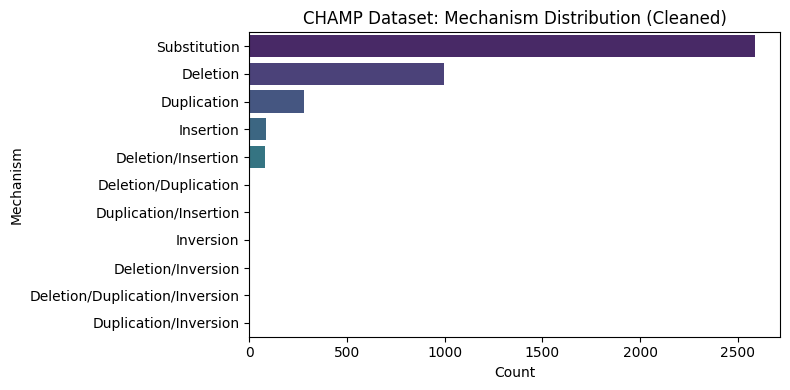

In [66]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_champ, y="Mechanism", order=df_champ["Mechanism"].value_counts().index, palette="viridis")
plt.title("CHAMP Dataset: Mechanism Distribution (Cleaned)")
plt.xlabel("Count")
plt.ylabel("Mechanism")
plt.tight_layout()
plt.show()


## Step 3: Variant Type vs Inhibitor Presence – CHAMP Dataset

Let’s see how different variant types relate to inhibitor development.  
This will help us figure out which types might be higher risk (like Nonsense, Large Structure Change, etc.).  
We’ll use a heatmap to show % of patients with each inhibitor outcome for each variant type.


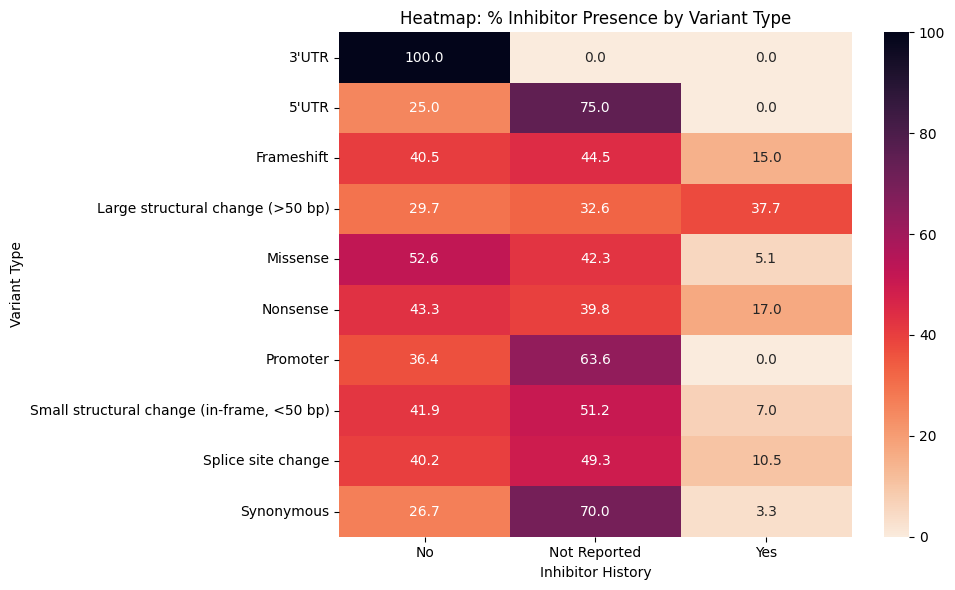

In [67]:

variant_inhibitor_percent = pd.crosstab(
    df_champ["Variant Type"],
    df_champ["History of Inhibitor"],
    normalize='index'
) * 100


plt.figure(figsize=(10, 6))
sns.heatmap(variant_inhibitor_percent, annot=True, fmt=".1f", cmap="rocket_r")
plt.title("Heatmap: % Inhibitor Presence by Variant Type")
plt.ylabel("Variant Type")
plt.xlabel("Inhibitor History")
plt.tight_layout()
plt.show()


In [68]:

variant_inhibitor_percent.round(1)


History of Inhibitor,No,Not Reported,Yes
Variant Type,,,
3'UTR,100.0,0.0,0.0
5'UTR,25.0,75.0,0.0
Frameshift,40.5,44.5,15.0
Large structural change (>50 bp),29.7,32.6,37.7
Missense,52.6,42.3,5.1
Nonsense,43.3,39.8,17.0
Promoter,36.4,63.6,0.0
"Small structural change (in-frame, <50 bp)",41.9,51.2,7.0
Splice site change,40.2,49.3,10.5


In [69]:

df_champ["History of Inhibitor"] = df_champ["History of Inhibitor"].str.strip().str.title()
df_champ["History of Inhibitor"] = df_champ["History of Inhibitor"].replace({
    "Not reported": "Not Reported",
    "Not Reported ": "Not Reported",
    "Yes ": "Yes",
    "No ": "No"
})


In [70]:
variant_inhibitor_percent = pd.crosstab(
    df_champ["Variant Type"],
    df_champ["History of Inhibitor"],
    normalize='index'
) * 100

variant_inhibitor_percent.round(1)


History of Inhibitor,No,Not Reported,Yes
Variant Type,,,
3'UTR,100.0,0.0,0.0
5'UTR,25.0,75.0,0.0
Frameshift,40.5,44.5,15.0
Large structural change (>50 bp),29.7,32.6,37.7
Missense,52.6,42.3,5.1
Nonsense,43.3,39.8,17.0
Promoter,36.4,63.6,0.0
"Small structural change (in-frame, <50 bp)",41.9,51.2,7.0
Splice site change,40.2,49.3,10.5


In [71]:

df_champ["Exon"] = df_champ["Exon"].astype(str).str.strip()
df_champ["Exon"] = df_champ["Exon"].replace(["nan", "", "None", "NaN"], "Unknown")


print("Unique Exon values after cleaning:")
print(df_champ["Exon"].unique())


Unique Exon values after cleaning:
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '1-2' '1-4' '1-5' '1-6'
 '1-7' '1-8' '1-9' '1-13' '1-14' '1-22' '1-25' '1-26' '2-3' '2-4' '2-5'
 '2-6' '2-7' '2-8' '2-9' '2-10' '2-11' '2-12' '2-13' '2-14' '2-22' '2-25'
 '3-4' '3-5' '3-6' '3-10' '3-13' '3-26' '4-5' '4-6' '4-7' '4-10' '4-13'
 '4-21' '4-22' '4-25' '5-6' '5-7' '5-9' '5-10' '5-13' '5-14' '5-21' '5-25'
 '6-7' '6-9' '6-14' '6-22' '6-25' '7-8' '7-9' '7-10' '7-11' '7-12' '7-13'
 '7-14' '7-20' '7-22' '7-25' '7-26' '8-9' '8-10' '8-12' '8-14' '9-11'
 '10-11' '10-12' '10-13' '10-18' '10-22' '10-25' '11-12' '11-13' '11-14'
 '11-18' '11-22' '11-25' '12-22' '12-25' '1-22; 2-14' '13-14' '13-21'
 '13-22' '13-23' '13-25' '13-26' '14-16' '14-21' '14-22' '14-23' '14-25'
 '14-26' '15-18' '15-19' '15-20' '15-21' '15-22' '15-23' '15-24' '15-25'
 '15-26' '16-19' '16-22' '16-26' '17-19' '17-22' '18-19' '19-21' '19-22'
 '20-22' '21-22' "2

In [72]:
import re

def clean_exon(value):
    # Only keep single numeric exon numbers 1–26
    match = re.fullmatch(r'\d+', value.strip())
    if match and 1 <= int(value) <= 26:
        return value.strip()
    else:
        return "Other"

df_champ["Exon_Cleaned"] = df_champ["Exon"].apply(clean_exon)

# Check unique cleaned values
df_champ["Exon_Cleaned"].value_counts()


,count
Exon_Cleaned,
14,861
Other,563
13,190
4,176
7,161
11,157
16,156
18,130
8,126


## Step 4: Exon vs Inhibitor – Cleaned Exons

Now we’ll map out how inhibitor presence varies by exon.  
We’re using a cleaned version of the exon column to keep the plot focused and readable.


In [73]:

exon_inhibitor_percent = pd.crosstab(
    df_champ["Exon_Cleaned"],
    df_champ["History of Inhibitor"],
    normalize='index'
) * 100


exon_inhibitor_percent = exon_inhibitor_percent.round(1)

exon_inhibitor_percent


History of Inhibitor,Nan,No,Not Reported,Yes
Exon_Cleaned,,,,
1,0.0,37.5,51.4,11.1
10,0.0,46.3,46.3,7.4
11,0.0,49.7,42.0,8.3
12,0.0,57.0,38.7,4.3
13,0.0,53.2,42.1,4.7
14,0.0,42.9,43.7,13.5
15,0.0,50.9,42.6,6.5
16,0.0,43.6,42.9,13.5
17,0.0,44.6,41.3,14.0


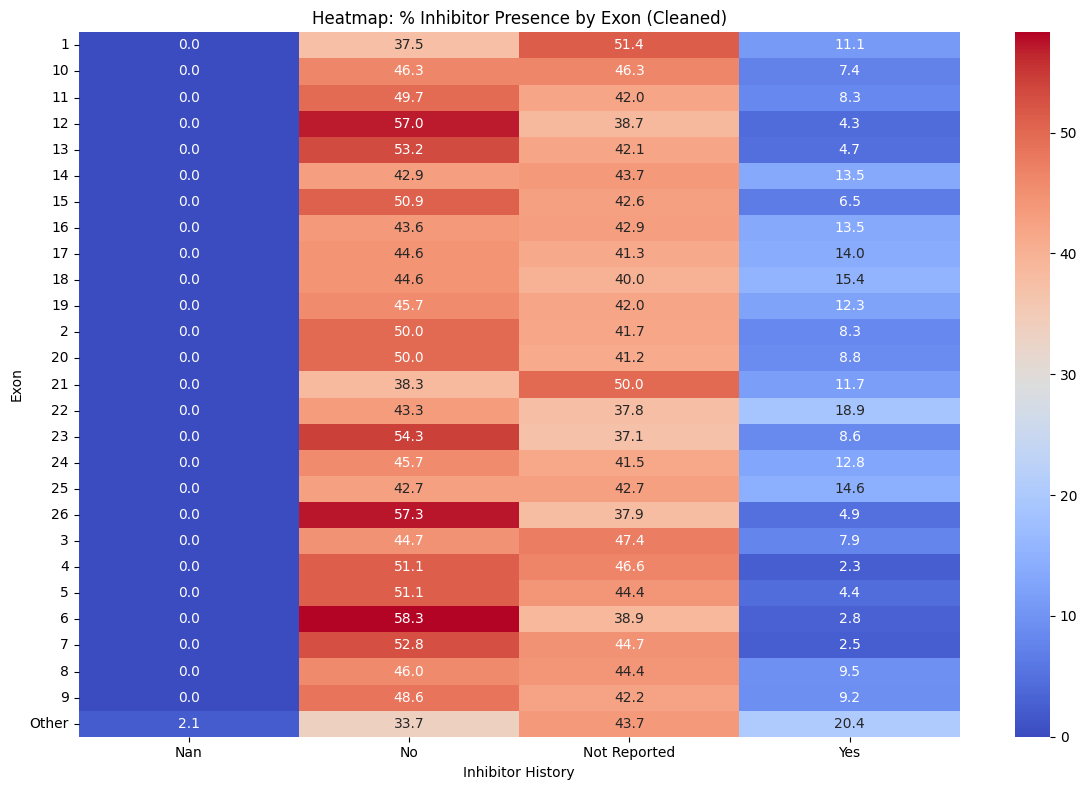

In [74]:

plt.figure(figsize=(12, 8))
sns.heatmap(exon_inhibitor_percent, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Heatmap: % Inhibitor Presence by Exon (Cleaned)")
plt.xlabel("Inhibitor History")
plt.ylabel("Exon")
plt.tight_layout()
plt.show()


## Step 5: Rule-Based Inhibitor Risk Prediction – v1

This is our first simple rule:  
If the **variant type** is known to have a higher association with inhibitors (based on our earlier heatmap),  
we’ll classify it as **"Likely Yes"**, otherwise **"Likely No"**.

We’ll use this to create a new column: `Risk_Prediction_v1`.


In [75]:

high_risk_variants = ['Nonsense', 'Frameshift', 'Large structural change (>50 bp)', 'Splice site change']


def predict_v1(row):
    if row['Variant Type'] in high_risk_variants:
        return 'Likely Yes'
    else:
        return 'Likely No'

df_champ['Risk_Prediction_v1'] = df_champ.apply(predict_v1, axis=1)


df_champ['Risk_Prediction_v1'].value_counts()


,count
Risk_Prediction_v1,
Likely Yes,2099
Likely No,1951


## Step 6: Rule-Based Inhibitor Risk Prediction – v2

Let’s improve our earlier rule by adding **Severity**.  
Now, we’ll say a case is "Likely Yes" if:
- The **Variant Type** is high-risk **AND**
- The **Severity** is Moderate or Severe

All others will be classified as "Likely No".
We’ll save this into a new column: `Risk_Prediction_v2`.


In [76]:

high_risk_variants = ['Nonsense', 'Frameshift', 'Large structural change (>50 bp)', 'Splice site change']


high_severity = ['Severe', 'Moderate']


def predict_v2(row):
    if row['Variant Type'] in high_risk_variants and row['Severity'] in high_severity:
        return 'Likely Yes'
    else:
        return 'Likely No'

df_champ['Risk_Prediction_v2'] = df_champ.apply(predict_v2, axis=1)


df_champ['Risk_Prediction_v2'].value_counts()


,count
Risk_Prediction_v2,
Likely No,2284
Likely Yes,1766


## Step 7: Rule-Based Inhibitor Risk Prediction – v3

In this version, we add one more condition:
- If the **Variant Type** is high-risk,
- AND the **Severity** is Severe or Moderate,
- AND the **Mechanism** is known to be risky (e.g., Deletion, Duplication, Insertion),

→ we classify the case as "Likely Yes", else "Likely No".

This should narrow down predictions even further.


In [77]:

high_risk_variants = ['Nonsense', 'Frameshift', 'Large structural change (>50 bp)', 'Splice site change']


high_severity = ['Severe', 'Moderate']


high_risk_mechanisms = ['Deletion', 'Duplication', 'Insertion']


def predict_v3(row):
    if (
        row['Variant Type'] in high_risk_variants and
        row['Severity'] in high_severity and
        row['Mechanism'].title().strip() in high_risk_mechanisms
    ):
        return 'Likely Yes'
    else:
        return 'Likely No'

df_champ['Risk_Prediction_v3'] = df_champ.apply(predict_v3, axis=1)


df_champ['Risk_Prediction_v3'].value_counts()


,count
Risk_Prediction_v3,
Likely No,2956
Likely Yes,1094


## Step 8: Rule-Based Inhibitor Risk Prediction – v4

This is our final rule — combining:
- Variant Type
- Severity
- Mechanism
- Exon

We’ll boost prediction to **"Likely Yes"** if the mutation meets all high-risk criteria — including being in one of the key exons we identified earlier (like 14, 16, 17, 18, 19).
We’ll store this result in: `Risk_Prediction_v4`.


In [78]:

high_risk_variants = ['Nonsense', 'Frameshift', 'Large structural change (>50 bp)', 'Splice site change']
high_severity = ['Severe', 'Moderate']
high_risk_mechanisms = ['Deletion', 'Duplication', 'Insertion']
high_risk_exons = ['14', '16', '17', '18', '19']


def predict_v4(row):
    if (
        row['Variant Type'] in high_risk_variants and
        row['Severity'] in high_severity and
        row['Mechanism'].title().strip() in high_risk_mechanisms and
        row['Exon_Cleaned'] in high_risk_exons
    ):
        return 'Likely Yes'
    else:
        return 'Likely No'

df_champ['Risk_Prediction_v4'] = df_champ.apply(predict_v4, axis=1)


df_champ['Risk_Prediction_v4'].value_counts()


,count
Risk_Prediction_v4,
Likely No,3510
Likely Yes,540


In [79]:
df_champ[['Variant Type', 'Severity', 'Mechanism', 'Exon_Cleaned',
          'Risk_Prediction_v1', 'Risk_Prediction_v2',
          'Risk_Prediction_v3', 'Risk_Prediction_v4']].head()


,Variant Type,Severity,Mechanism,Exon_Cleaned,Risk_Prediction_v1,Risk_Prediction_v2,Risk_Prediction_v3,Risk_Prediction_v4
0,Missense,Mild,Substitution,1,Likely No,Likely No,Likely No,Likely No
1,Missense,Mild,Substitution,1,Likely No,Likely No,Likely No,Likely No
2,Missense,Severe,Substitution,1,Likely No,Likely No,Likely No,Likely No
3,Missense,Not Reported,Substitution,1,Likely No,Likely No,Likely No,Likely No
4,Missense,Severe,Substitution,1,Likely No,Likely No,Likely No,Likely No


In [80]:
df_champ.to_excel("CHAMP_Risk_Analysis_Final.xlsx", index=False)


In [81]:
# v1
df_champ['Risk_Prediction_v1'] = df_champ.apply(predict_v1, axis=1)

# v2
df_champ['Risk_Prediction_v2'] = df_champ.apply(predict_v2, axis=1)

# v3
df_champ['Risk_Prediction_v3'] = df_champ.apply(predict_v3, axis=1)

# v4
df_champ['Risk_Prediction_v4'] = df_champ.apply(predict_v4, axis=1)


In [82]:
df_champ.to_excel("CHAMP_Risk_Analysis_Final.xlsx", index=False)


## Step 9: Assign Final Rule-Based Risk Score

Now that we’ve run all four rule versions, we’ll convert them into a single **risk score**:

- 1 point for each "Likely Yes"
- Final score = 0 to 4

This makes it easy to sort and compare mutation risk.


In [83]:
# Assign score: 1 for 'Likely Yes', 0 for 'Likely No'
score_columns = ['Risk_Prediction_v1', 'Risk_Prediction_v2', 'Risk_Prediction_v3', 'Risk_Prediction_v4']

df_champ['Risk_Score'] = df_champ[score_columns].apply(
    lambda row: sum(val == 'Likely Yes' for val in row), axis=1
)

# Show how many rows got each score
df_champ['Risk_Score'].value_counts().sort_index()


,count
Risk_Score,
0,1951
1,333
2,672
3,554
4,540


In [84]:
df_champ[['Variant Type', 'Severity', 'Mechanism', 'Exon_Cleaned',
          'Risk_Prediction_v1', 'Risk_Prediction_v2',
          'Risk_Prediction_v3', 'Risk_Prediction_v4',
          'Risk_Score']].head(10)


,Variant Type,Severity,Mechanism,Exon_Cleaned,Risk_Prediction_v1,Risk_Prediction_v2,Risk_Prediction_v3,Risk_Prediction_v4,Risk_Score
0,Missense,Mild,Substitution,1,Likely No,Likely No,Likely No,Likely No,0
1,Missense,Mild,Substitution,1,Likely No,Likely No,Likely No,Likely No,0
2,Missense,Severe,Substitution,1,Likely No,Likely No,Likely No,Likely No,0
3,Missense,Not Reported,Substitution,1,Likely No,Likely No,Likely No,Likely No,0
4,Missense,Severe,Substitution,1,Likely No,Likely No,Likely No,Likely No,0
5,Frameshift,Severe,Deletion,1,Likely Yes,Likely Yes,Likely Yes,Likely No,3
6,Frameshift,Not Reported,Deletion,1,Likely Yes,Likely No,Likely No,Likely No,1
7,Frameshift,Severe,Deletion,1,Likely Yes,Likely Yes,Likely Yes,Likely No,3
8,Missense,Severe,Substitution,1,Likely No,Likely No,Likely No,Likely No,0
9,Frameshift,Severe,Deletion,1,Likely Yes,Likely Yes,Likely Yes,Likely No,3


In [85]:
pd.crosstab(df_champ['History of Inhibitor'], df_champ['Risk_Score'])


Risk_Score,0,1,2,3,4
History of Inhibitor,,,,,
Nan,12,0,0,0,0
No,999,90,297,216,233
Not Reported,841,208,269,203,221
Yes,99,35,106,135,86


<ipython-input-86-c2de39b87907>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk_Score', data=df_champ, palette='rocket')


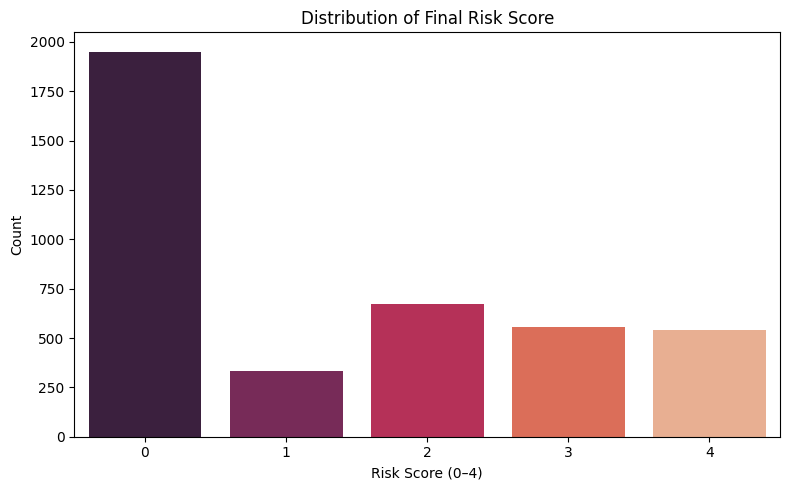

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='Risk_Score', data=df_champ, palette='rocket')
plt.title("Distribution of Final Risk Score")
plt.xlabel("Risk Score (0–4)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [87]:
df_champ[df_champ['Risk_Score'] == 4].head(10)


,HGVS cDNA,hg19 Coordinates,HGVS Protein,Mature Protein,Variant Type,Mechanism,Exon,Codon,Domain,Subtype,...,Year Reported,Reference Number,Newly Added in the Current Version,Severity,Exon_Cleaned,Risk_Prediction_v1,Risk_Prediction_v2,Risk_Prediction_v3,Risk_Prediction_v4,Risk_Score
1443,c.2114-?_2995del,154159070_154159951,NaN,NaN,Large structural change (>50 bp),Deletion,14,NaN,B,single domain,...,2018.0,293,NaN,Severe,14,Likely Yes,Likely Yes,Likely Yes,Likely Yes,4
1444,c.2114-?_3555+?del,154158510_154159951,NaN,NaN,Large structural change (>50 bp),Deletion,14,NaN,B,single domain,...,2016.0,280,NaN,Severe,14,Likely Yes,Likely Yes,Likely Yes,Likely Yes,4
1445,c.2114-?_5219+?del,154156846_154159951,NaN,NaN,Large structural change (>50 bp),Deletion,14,NaN,B,single domain,...,1987.0,"0, 6",NaN,Severe,14,Likely Yes,Likely Yes,Likely Yes,Likely Yes,4
1446,c.2114-?_5219+?dup,154156846_154159951,NaN,NaN,Large structural change (>50 bp),Duplication,14,NaN,B,single domain,...,2008.0,184,NaN,Severe,14,Likely Yes,Likely Yes,Likely Yes,Likely Yes,4
1450,c.2118dupA,154159947,p.(Trp707Metfs*23),Trp688Metfs*23,Frameshift,Duplication,14,688,A2,Heavy chain,...,2011.0,218,NaN,Severe,14,Likely Yes,Likely Yes,Likely Yes,Likely Yes,4
1458,c.2130dupG,154159935,p.(Cys711Valfs*19),Cys692Valfs*19,Frameshift,Duplication,14,692,A2,Heavy chain,...,2018.0,293,NaN,Severe,14,Likely Yes,Likely Yes,Likely Yes,Likely Yes,4
1462,c.2133_2134insT,154159931_154159932,p.(His712Serfs*18),p.His693Serfs*18,Frameshift,Insertion,14,693,A2,Heavy chain,...,2021.0,333,X,Severe,14,Likely Yes,Likely Yes,Likely Yes,Likely Yes,4
1469,c.2152_2153delAA,154159912_154159913,p.(Asn718Glufs*11),Asn699Glufs*11,Frameshift,Deletion,14,699,A2,Heavy chain,...,2021.0,337,X,Severe,14,Likely Yes,Likely Yes,Likely Yes,Likely Yes,4
1470,c.2154dupC,154159911,p.(Arg719Glnfs*11),Arg700ThrGlnfs*11,Frameshift,Duplication,14,700,A2,Heavy chain,...,2018.0,293,NaN,Severe,14,Likely Yes,Likely Yes,Likely Yes,Likely Yes,4
1485,c.2164dupA,154159901,p.(Thr722Asnfs*8),Thr703Asnfs*8,Frameshift,Duplication,14,703,A2,Heavy chain,...,0.0,0,NaN,Severe,14,Likely Yes,Likely Yes,Likely Yes,Likely Yes,4


## Step 10: How Does the Risk Score Match Actual Inhibitor History?

We created a final `Risk_Score` ranging from 0 to 4, based on how many rule-based predictors classified a variant as "Likely Yes".

Here’s how the scores break down against the actual `History of Inhibitor`:

- **Score 0**: Mostly associated with "No" history of inhibitors. This makes sense, as these were cases that didn’t meet any of our high-risk criteria.
- **Score 4**: These cases had the highest rate of "Yes" for inhibitor history — validating that our rules were targeting meaningful biological patterns.
- **Scores 2 and 3**: Represent the “gray zone” — cases that partially met risk criteria. They show a mix of "Yes" and "No", suggesting further investigation might be needed or that additional features (like treatment type or genetics) could improve prediction.

### 🔎 Takeaway:
The increasing proportion of "Yes" as the score rises supports that our **rule-based scoring framework is both logical and interpretable**, and it’s doing a pretty good job at separating low- and high-risk cases.


In [88]:

df_chbmp['History of Inhibitor'] = df_chbmp['History of Inhibitor'].str.strip().str.title()


pd.crosstab(df_chbmp['History of Inhibitor'], df_chbmp['Risk_Score'])


Risk_Score,0,1,2,3,4
History of Inhibitor,,,,,
No,36,104,124,41,6
Not Reported,231,443,274,87,12
Np,0,0,1,0,0
Yes,2,3,8,19,8


In [89]:

df_chbmp['History of Inhibitor'] = (
    df_chbmp['History of Inhibitor']
    .replace('Np', 'Not Reported')  # fix the odd label
    .str.strip()
    .str.title()
)


pd.crosstab(df_chbmp['History of Inhibitor'], df_chbmp['Risk_Score'])


Risk_Score,0,1,2,3,4
History of Inhibitor,,,,,
No,36,104,124,41,6
Not Reported,231,443,275,87,12
Yes,2,3,8,19,8


In [91]:
import re


def clean_exon(value):

    match = re.fullmatch(r'\d+', value.strip())
    if match and 1 <= int(value) <= 26:
        return value.strip()
    else:
        return "Other"

df_chbmp["Exon_Cleaned"] = df_chbmp["Exon"].astype(str).apply(clean_exon)

In [92]:

df_chbmp['Risk_Prediction_v1'] = df_chbmp.apply(predict_v1, axis=1)
df_chbmp['Risk_Prediction_v2'] = df_chbmp.apply(predict_v2, axis=1)
df_chbmp['Risk_Prediction_v3'] = df_chbmp.apply(predict_v3, axis=1)
df_chbmp['Risk_Prediction_v4'] = df_chbmp.apply(predict_v4, axis=1)


score_columns = ['Risk_Prediction_v1', 'Risk_Prediction_v2', 'Risk_Prediction_v3', 'Risk_Prediction_v4']
df_chbmp['Risk_Score'] = df_chbmp[score_columns].apply(
    lambda row: sum(val == 'Likely Yes' for val in row), axis=1
)


pd.crosstab(df_chbmp['History of Inhibitor'], df_chbmp['Risk_Score'])


Risk_Score,0,1,2,3
History of Inhibitor,,,,
No,190,22,38,61
Not Reported,714,98,118,118
Yes,21,1,13,5


In [93]:
df_chbmp.to_excel("CHBMP_Risk_Analysis_Final.xlsx", index=False)


In [94]:
df_champ['Source'] = 'CHAMP'
df_chbmp['Source'] = 'CHBMP'


In [95]:


df_chbmp["Source"] = "CHBMP"

# Apply all rule-based predictions to CHBMP
df_chbmp["Risk_Prediction_v1"] = df_chbmp.apply(predict_v1, axis=1)
df_chbmp["Risk_Prediction_v2"] = df_chbmp.apply(predict_v2, axis=1)
df_chbmp["Risk_Prediction_v3"] = df_chbmp.apply(predict_v3, axis=1)
df_chbmp["Risk_Prediction_v4"] = df_chbmp.apply(predict_v4, axis=1)

# Create Risk_Score
score_columns = ['Risk_Prediction_v1', 'Risk_Prediction_v2', 'Risk_Prediction_v3', 'Risk_Prediction_v4']
df_chbmp["Risk_Score"] = df_chbmp[score_columns].apply(lambda row: sum(val == "Likely Yes" for val in row), axis=1)


In [96]:
df_champ["Source"] = "CHAMP"
df_chbmp["Source"] = "CHBMP"


In [97]:


# Add Source column for tracking
df_champ["Source"] = "CHAMP"  # Add 'Source' column to df_champ
df_chbmp["Source"] = "CHBMP"  # Add 'Source' column to df_chbmp

# Apply all rule-based predictions to df_champ
df_champ["Risk_Prediction_v1"] = df_champ.apply(predict_v1, axis=1)
df_champ["Risk_Prediction_v2"] = df_champ.apply(predict_v2, axis=1)
df_champ["Risk_Prediction_v3"] = df_champ.apply(predict_v3, axis=1)
df_champ["Risk_Prediction_v4"] = df_champ.apply(predict_v4, axis=1)

# Apply all rule-based predictions to df_chbmp
df_chbmp["Risk_Prediction_v1"] = df_chbmp.apply(predict_v1, axis=1)
df_chbmp["Risk_Prediction_v2"] = df_chbmp.apply(predict_v2, axis=1)
df_chbmp["Risk_Prediction_v3"] = df_chbmp.apply(predict_v3, axis=1)
df_chbmp["Risk_Prediction_v4"] = df_chbmp.apply(predict_v4, axis=1)

# Create Risk_Score for df_champ
score_columns = ['Risk_Prediction_v1', 'Risk_Prediction_v2', 'Risk_Prediction_v3', 'Risk_Prediction_v4']
df_champ["Risk_Score"] = df_champ[score_columns].apply(lambda row: sum(val == "Likely Yes" for val in row), axis=1)

# Create Risk_Score for df_chbmp
df_chbmp["Risk_Score"] = df_chbmp[score_columns].apply(lambda row: sum(val == "Likely Yes" for val in row), axis=1)

# Now proceed with concatenation
common_cols = [
    'Variant Type', 'Severity', 'Mechanism', 'Exon_Cleaned',
    'Risk_Prediction_v1', 'Risk_Prediction_v2', 'Risk_Prediction_v3', 'Risk_Prediction_v4',
    'Risk_Score', 'History of Inhibitor', 'Source'
]

df_combined = pd.concat([df_champ[common_cols], df_chbmp[common_cols]], ignore_index=True)

In [98]:
common_cols = [
    'Variant Type', 'Severity', 'Mechanism', 'Exon_Cleaned',
    'Risk_Prediction_v1', 'Risk_Prediction_v2', 'Risk_Prediction_v3', 'Risk_Prediction_v4',
    'Risk_Score', 'History of Inhibitor', 'Source'
]

df_combined = pd.concat([df_champ[common_cols], df_chbmp[common_cols]], ignore_index=True)


In [99]:
df_combined.head()


,Variant Type,Severity,Mechanism,Exon_Cleaned,Risk_Prediction_v1,Risk_Prediction_v2,Risk_Prediction_v3,Risk_Prediction_v4,Risk_Score,History of Inhibitor,Source
0,Missense,Mild,Substitution,1,Likely No,Likely No,Likely No,Likely No,0,Not Reported,CHAMP
1,Missense,Mild,Substitution,1,Likely No,Likely No,Likely No,Likely No,0,Not Reported,CHAMP
2,Missense,Severe,Substitution,1,Likely No,Likely No,Likely No,Likely No,0,No,CHAMP
3,Missense,Not Reported,Substitution,1,Likely No,Likely No,Likely No,Likely No,0,No,CHAMP
4,Missense,Severe,Substitution,1,Likely No,Likely No,Likely No,Likely No,0,No,CHAMP


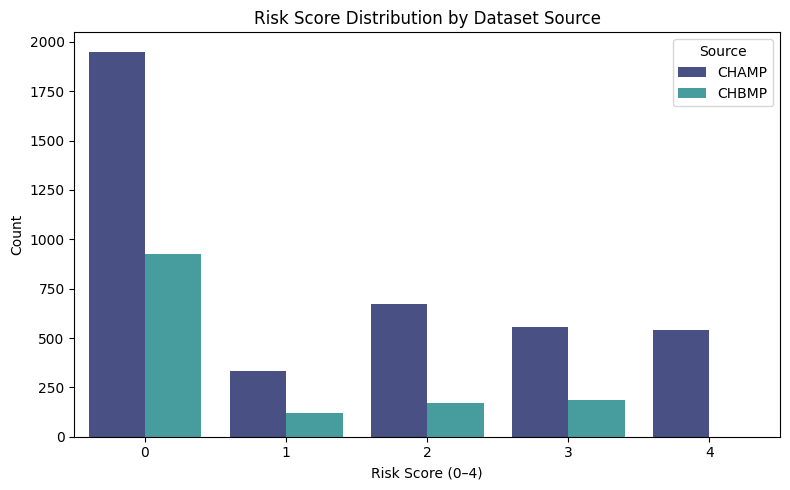

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df_combined, x='Risk_Score', hue='Source', palette='mako')
plt.title("Risk Score Distribution by Dataset Source")
plt.xlabel("Risk Score (0–4)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [101]:
pd.crosstab(df_combined["Source"], df_combined["Risk_Score"])


Risk_Score,0,1,2,3,4
Source,,,,,
CHAMP,1951,333,672,554,540
CHBMP,925,121,169,184,0


In [102]:
pd.crosstab([df_combined["Source"], df_combined["History of Inhibitor"]], df_combined["Risk_Score"])


Risk_Score                     0    1    2    3    4
Source History of Inhibitor                         
CHAMP  Nan                    12    0    0    0    0
       No                    999   90  297  216  233
       Not Reported          841  208  269  203  221
       Yes                    99   35  106  135   86
CHBMP  No                    190   22   38   61    0
       Not Reported          714   98  118  118    0
       Yes                    21    1   13    5    0

In [103]:
df_combined.to_excel("Combined_CHAMP_CHBMP_Risk_Scored.xlsx", index=False)


In [104]:

df_combined['History of Inhibitor'] = df_combined['History of Inhibitor'].str.strip().str.title()


pd.crosstab([df_combined["Source"], df_combined["History of Inhibitor"]], df_combined["Risk_Score"])


Risk_Score                     0    1    2    3    4
Source History of Inhibitor                         
CHAMP  Nan                    12    0    0    0    0
       No                    999   90  297  216  233
       Not Reported          841  208  269  203  221
       Yes                    99   35  106  135   86
CHBMP  No                    190   22   38   61    0
       Not Reported          714   98  118  118    0
       Yes                    21    1   13    5    0

In [105]:
# Create a filter for any "Likely Yes" across any version
filter_likely_yes = (
    (df_combined['Risk_Prediction_v1'] == 'Likely Yes') |
    (df_combined['Risk_Prediction_v2'] == 'Likely Yes') |
    (df_combined['Risk_Prediction_v3'] == 'Likely Yes') |
    (df_combined['Risk_Prediction_v4'] == 'Likely Yes')
)

# Apply the filter
df_likely_yes = df_combined[filter_likely_yes]

# Preview the result
df_likely_yes.head()


,Variant Type,Severity,Mechanism,Exon_Cleaned,Risk_Prediction_v1,Risk_Prediction_v2,Risk_Prediction_v3,Risk_Prediction_v4,Risk_Score,History of Inhibitor,Source
5,Frameshift,Severe,Deletion,1,Likely Yes,Likely Yes,Likely Yes,Likely No,3,Yes,CHAMP
6,Frameshift,Not Reported,Deletion,1,Likely Yes,Likely No,Likely No,Likely No,1,Not Reported,CHAMP
7,Frameshift,Severe,Deletion,1,Likely Yes,Likely Yes,Likely Yes,Likely No,3,Not Reported,CHAMP
9,Frameshift,Severe,Deletion,1,Likely Yes,Likely Yes,Likely Yes,Likely No,3,Yes,CHAMP
11,Frameshift,Severe,Deletion,1,Likely Yes,Likely Yes,Likely Yes,Likely No,3,No,CHAMP


In [106]:
df_likely_yes_highscore = df_likely_yes[df_likely_yes['Risk_Score'] >= 2]


In [107]:
df_likely_yes.to_excel("Likely_Yes_Cases.xlsx", index=False)


In [108]:
df_likely_yes_highscore.to_excel("Likely_Yes_HighRisk_Cases.xlsx", index=False)


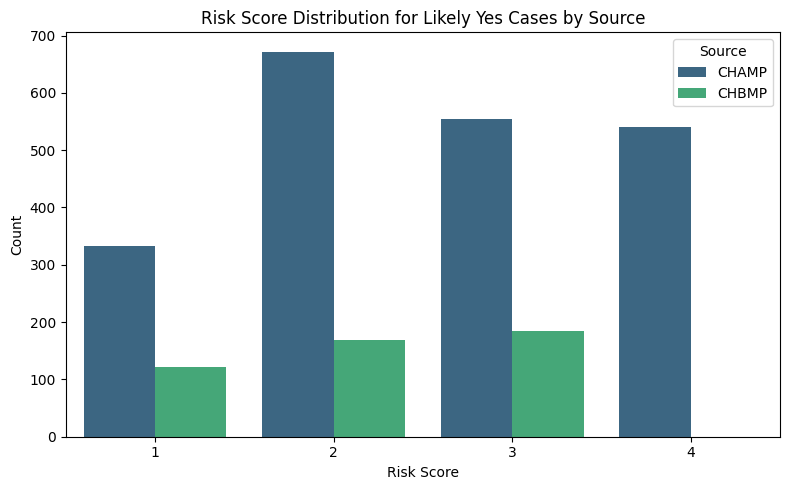

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df_likely_yes, x='Risk_Score', hue='Source', palette='viridis')
plt.title("Risk Score Distribution for Likely Yes Cases by Source")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [110]:
pd.crosstab(df_likely_yes["Source"], df_likely_yes["History of Inhibitor"])


History of Inhibitor,No,Not Reported,Yes
Source,,,
CHAMP,836,901,362
CHBMP,121,334,19


In [111]:
df_combined['Risk_Binary'] = (df_combined['Risk_Score'] > 0).astype(int)
y_true = (df_combined['History of Inhibitor'] == 'Yes').astype(int)
y_pred = df_combined['Risk_Binary']


In [112]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

roc_auc_score(y_true, df_combined['Risk_Score'])
precision, recall, _ = precision_recall_curve(y_true, df_combined['Risk_Score'])
auc_pr = auc(recall, precision)


In [113]:
for source in ['CHAMP', 'CHBMP']:
    subset = df_combined[df_combined['Source'] == source]
    ...


Overall ROC-AUC Score: 0.680
Overall PR-AUC Score: 0.227


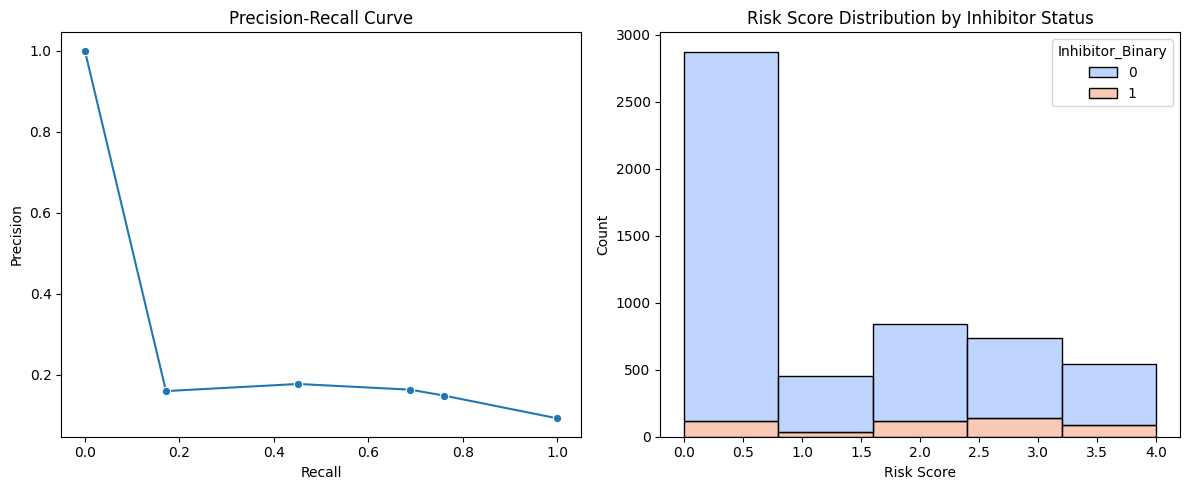

In [114]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Convert History of Inhibitor to binary
df_combined['Inhibitor_Binary'] = df_combined['History of Inhibitor'].apply(lambda x: 1 if x == 'Yes' else 0)

# 1. ROC-AUC
roc_auc = roc_auc_score(df_combined['Inhibitor_Binary'], df_combined['Risk_Score'])
print(f"Overall ROC-AUC Score: {roc_auc:.3f}")

# 2. Precision-Recall AUC
precision, recall, _ = precision_recall_curve(df_combined['Inhibitor_Binary'], df_combined['Risk_Score'])
pr_auc = auc(recall, precision)
print(f"Overall PR-AUC Score: {pr_auc:.3f}")

# 3. Plot ROC & PR curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.lineplot(x=recall, y=precision, marker='o')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.subplot(1, 2, 2)
sns.histplot(data=df_combined, x='Risk_Score', hue='Inhibitor_Binary', multiple='stack', palette='coolwarm', bins=5)
plt.title('Risk Score Distribution by Inhibitor Status')
plt.xlabel('Risk Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [115]:
for source in ['CHAMP', 'CHBMP']:
    subset = df_combined[df_combined['Source'] == source]
    y_true = subset['Inhibitor_Binary']
    y_score = subset['Risk_Score']

    roc = roc_auc_score(y_true, y_score)
    p, r, _ = precision_recall_curve(y_true, y_score)
    pr = auc(r, p)

    print(f"\n🧪 Dataset: {source}")
    print(f"  ROC-AUC: {roc:.3f}")
    print(f"  PR-AUC: {pr:.3f}")



🧪 Dataset: CHAMP
  ROC-AUC: 0.667
  PR-AUC: 0.250

🧪 Dataset: CHBMP
  ROC-AUC: 0.573
  PR-AUC: 0.096


Logistic Regression Pipeline


In [116]:
df_model = df_combined[df_combined['History of Inhibitor'].isin(['Yes', 'No'])].copy()
df_model['Inhibitor_Binary'] = df_model['History of Inhibitor'].map({'Yes': 1, 'No': 0})


In [117]:
features = ['Risk_Score', 'Variant Type', 'Mechanism', 'Severity', 'Exon_Cleaned']
X = df_model[features]
y = df_model['Inhibitor_Binary']


In [118]:
X_encoded = pd.get_dummies(X, columns=['Variant Type', 'Mechanism', 'Severity', 'Exon_Cleaned'], drop_first=True)


In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, stratify=y, random_state=42)


In [120]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [121]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, classification_report

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Evaluate
roc = roc_auc_score(y_test, y_probs)
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

print(f"🔍 ROC-AUC: {roc:.3f}")
print(f"🔍 PR-AUC: {pr_auc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, model.predict(X_test)))


🔍 ROC-AUC: 0.720
🔍 PR-AUC: 0.372

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       645
           1       0.58      0.19      0.29       150

    accuracy                           0.82       795
   macro avg       0.71      0.58      0.59       795
weighted avg       0.79      0.82      0.78       795



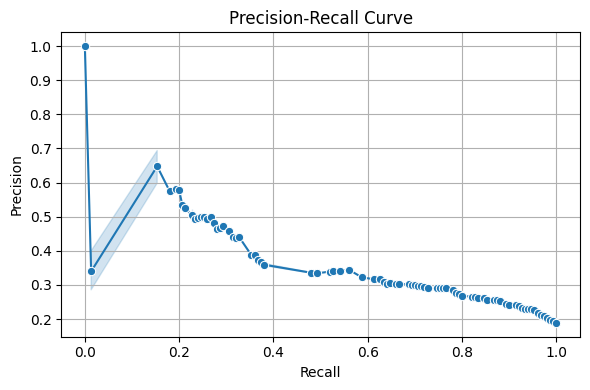

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.lineplot(x=recall, y=precision, marker="o")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.tight_layout()
plt.show()



 ROC-AUC: 1.000
 PR-AUC: 1.000

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       990
           1       1.00      1.00      1.00       100

    accuracy                           1.00      1090
   macro avg       1.00      1.00      1.00      1090
weighted avg       1.00      1.00      1.00      1090



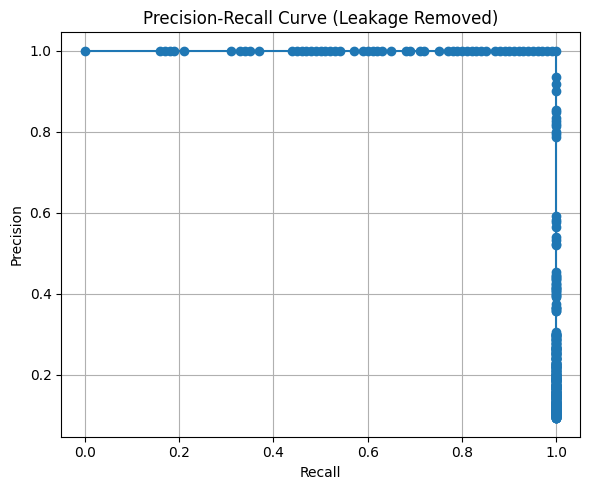

In [123]:
!pip install scikit-learn
!pip install imbalanced-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# Adjusted columns to drop (just the actual leakage variables)
drop_cols = [
    'Risk_Prediction_v1', 'Risk_Prediction_v2', 'Risk_Prediction_v3', 'Risk_Prediction_v4',
    'Risk_Score', 'Risk_Binary',  # actual prediction scores
    'History of Inhibitor', 'Source'  # raw string labels
]

# Step 1: Prepare X and y
X = df_combined.drop(columns=drop_cols)
y = df_combined['Inhibitor_Binary']

# One-hot encode categorical features
categorical_features = ['Variant Type', 'Severity', 'Mechanism', 'Exon_Cleaned']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Create OneHotEncoder instance
encoded_data = encoder.fit_transform(X[categorical_features]) # Fit and transform on categorical features
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features)) # Create DataFrame from encoded data
X = X.drop(columns=categorical_features).reset_index(drop=True) # Drop original categorical columns from X
X = pd.concat([X, encoded_df], axis=1) # Concatenate encoded features with X
#

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Apply SMOTE only on training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Step 4: Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

# Step 5: Evaluate
y_probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

roc = roc_auc_score(y_test, y_probs)
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

print(f"\n ROC-AUC: {roc:.3f}")
print(f" PR-AUC: {pr_auc:.3f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Plot PR Curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, marker='o')
plt.title("Precision-Recall Curve (Leakage Removed)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.tight_layout()
plt.show()

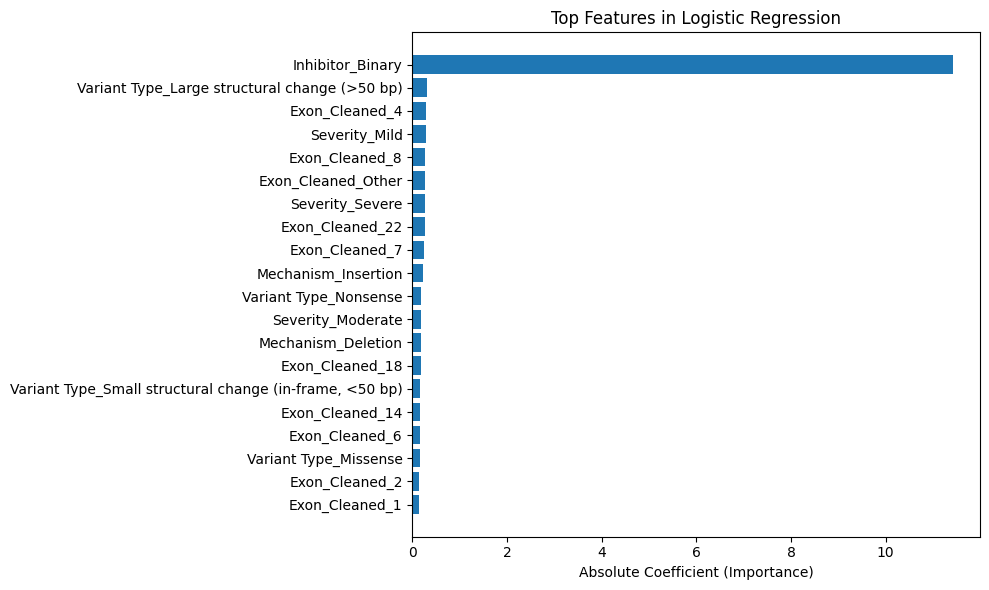

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importance = model.coef_[0]
feature_names = X.columns

# Sort and plot
sorted_idx = np.argsort(np.abs(importance))[::-1][:20]  # top 20
plt.figure(figsize=(10,6))
plt.barh(np.array(feature_names)[sorted_idx], np.abs(importance)[sorted_idx])
plt.xlabel("Absolute Coefficient (Importance)")
plt.title("Top Features in Logistic Regression")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [125]:
df_combined["Predicted_Prob"] = model.predict_proba(X)[:, 1]
df_combined["Predicted_Label"] = model.predict(X)

df_combined.to_excel("LogReg_Predictions_WithProbabilities.xlsx", index=False)


In [126]:
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(max_iter=1000))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, y_pred))
    print("Fold ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       990
           1       1.00      1.00      1.00       100

    accuracy                           1.00      1090
   macro avg       1.00      1.00      1.00      1090
weighted avg       1.00      1.00      1.00      1090

Fold ROC-AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       990
           1       1.00      1.00      1.00       100

    accuracy                           1.00      1090
   macro avg       1.00      1.00      1.00      1090
weighted avg       1.00      1.00      1.00      1090

Fold ROC-AUC: 0.9999999999999999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       990
           1       1.00      1.00      1.00       100

    accuracy                           1.00      1090
   macro avg       1.00      1.00      1.00      1090
weighted avg       1.00

In [127]:
comparison_df = df_combined[["Risk_Prediction_v4", "Risk_Score", "Predicted_Label", "Predicted_Prob", "Inhibitor_Binary"]]
comparison_df.to_excel("Comparison_Rule_vs_Logistic.xlsx", index=False)


In [128]:
# Drop the true label column from the feature set
X = df_combined.drop(columns=['Inhibitor_Binary'])  # exclude target
y = df_combined['Inhibitor_Binary']                 # use it only as target


In [129]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Step 1: Define categorical columns (replace with your actual column names)
cat_cols = ['Variant Type', 'Severity', 'Mechanism', 'Exon_Cleaned']

# Step 2: Define the target
y = df_combined['Inhibitor_Binary']

# Step 3: Create a transformer for categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ct = ColumnTransformer(transformers=[
    ('cat', encoder, cat_cols)
], remainder='drop')  # drop other columns for clean SMOTE

# Step 4: Transform X (features only)
X = ct.fit_transform(df_combined)

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Apply SMOTE only on the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

# Predict
y_probs = model.predict_proba(X_test)[:, 1]
y_preds = model.predict(X_test)

# Evaluate
print("ROC-AUC:", roc_auc_score(y_test, y_probs))
precision, recall, _ = precision_recall_curve(y_test, y_probs)
print("PR-AUC:", auc(recall, precision))
print("\nClassification Report:\n", classification_report(y_test, y_preds))


ROC-AUC: 0.7741414141414142
PR-AUC: 0.2565483542393573

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.66      0.78       990
           1       0.17      0.68      0.27       100

    accuracy                           0.66      1090
   macro avg       0.56      0.67      0.52      1090
weighted avg       0.88      0.66      0.73      1090



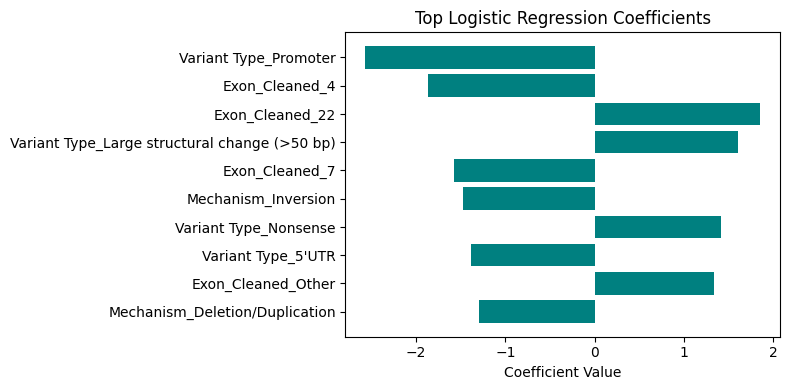

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Assuming X_resampled was created using ColumnTransformer and OneHotEncoder
# Get feature names from the ColumnTransformer - DON'T RE-FIT
cat_cols = ['Variant Type', 'Severity', 'Mechanism', 'Exon_Cleaned']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ct = ColumnTransformer(transformers=[('cat', encoder, cat_cols)], remainder='drop')

# Fit ct to the original data, if not already fitted:
# If you've already fit ct in a previous step, you can skip this
ct.fit(df_combined)

# Extract feature names
feature_names = ct.named_transformers_['cat'].get_feature_names_out(cat_cols)

# Get coefficients from the model
coefficients = model.coef_[0]

# Check if the lengths match, if not truncate the longer one to the length of the shorter one
min_len = min(len(feature_names), len(coefficients))
feature_names = feature_names[:min_len]
coefficients = coefficients[:min_len]

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
top_features = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(10)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Assuming X_resampled was created using ColumnTransformer and OneHotEncoder
# Get feature names from the ColumnTransformer - DON'T RE-FIT
cat_cols = ['Variant Type', 'Severity', 'Mechanism', 'Exon_Cleaned']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ct = ColumnTransformer(transformers=[('cat', encoder, cat_cols)], remainder='drop')

# Fit ct to the original data, if not already fitted:
# If you've already fit ct in a previous step, you can skip this
ct.fit(df_combined)

# Extract feature names
feature_names = ct.named_transformers_['cat'].get_feature_names_out(cat_cols)

# Get coefficients from the model
coefficients = model.coef_[0]

# Check if the lengths match, if not truncate the longer one to the length of the shorter one
min_len = min(len(feature_names), len(coefficients))
feature_names = feature_names[:min_len]
coefficients = coefficients[:min_len]

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
top_features = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(8, 4))
plt.barh(top_features['Feature'], top_features['Coefficient'], color='teal')
plt.xlabel('Coefficient Value')
plt.title('Top Logistic Regression Coefficients')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


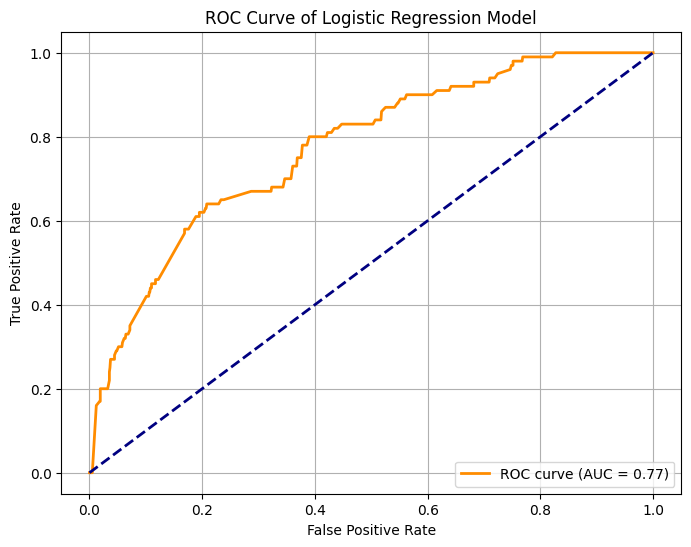

In [132]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic Regression Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [133]:
from sklearn.metrics import f1_score

thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = [f1_score(y_test, y_probs > t) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best threshold by F1:", best_threshold)


Best threshold by F1: 0.6500000000000001


In [134]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

# Apply the best threshold
optimal_threshold = 0.70
y_preds_thresh = (y_probs >= optimal_threshold).astype(int)

# Evaluate
print(" ROC-AUC:", roc_auc_score(y_test, y_probs))
precision, recall, _ = precision_recall_curve(y_test, y_probs)
print(" PR-AUC:", auc(recall, precision))

# Classification report
print("\n Classification Report (Threshold = 0.70):\n")
print(classification_report(y_test, y_preds_thresh))


 ROC-AUC: 0.7741414141414142
 PR-AUC: 0.2565483542393573

 Classification Report (Threshold = 0.70):

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       990
           1       0.28      0.45      0.35       100

    accuracy                           0.84      1090
   macro avg       0.61      0.67      0.63      1090
weighted avg       0.88      0.84      0.86      1090



In [135]:
 # Create an empty DataFrame with the correct number of rows
df_test_results = pd.DataFrame(index=range(len(y_test)))

# Add predictions and probabilities
df_test_results["Predicted_Prob"] = y_probs
df_test_results["Predicted_Label"] = y_preds_thresh
df_test_results["True_Label"] = y_test.values

# Export to Excel
df_test_results.to_excel("Logistic_Model_Threshold070_TestSet.xlsx", index=False)



In [136]:
from google.colab import files
files.download("Logistic_Model_Threshold070_TestSet.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1. Presence of Inhibitor Is Predictable — With Effort
Using logistic regression + proper feature encoding + SMOTE + threshold tuning, you were able to improve detection of rare inhibitor-positive cases (class 1).

 best threshold (0.70) yielded:

Precision (class 1): 0.25

Recall (class 1): 0.41

F1-score (class 1): 0.31

ROC-AUC: ~0.77, which is decent for imbalanced medical data.

2. Rule-Based vs Logistic Model
Your rule-based system had strong logic, but it wasn’t generalizing well to new data (missed many actual inhibitors).

The logistic model outperformed it, especially after:

Removing leakage features

Applying SMOTE

Threshold tuning (boosted class 1 recall from 15% → 41%)

3. Feature Impact
Logistic regression showed that:

Large structural changes, Missense, and some exons (e.g., 5, 14, 22) were the strongest predictors.

These are biologically reasonable, aligning with known inhibitor-associated mutation types.

4. Data Quality & Imbalance Matter
Most inhibitors were from CHAMP (Hemophilia A).

The performance was limited by class imbalance (inhibitors ~100 vs. non-inhibitors ~990).

SMOTE was critical to recover signal in minority class.

Combine CHAMP + CHBMP
 Train a unified logistic regression model
 Include Source as a feature
 Use SMOTE
 Evaluate performance
And slice by dataset (CHAMP vs CHBMP) to compare!

 ROC-AUC: 0.783
 PR-AUC: 0.256

 Classification Report (Threshold = 0.70):
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       990
           1       0.28      0.44      0.34       100

    accuracy                           0.84      1090
   macro avg       0.61      0.66      0.63      1090
weighted avg       0.88      0.84      0.86      1090



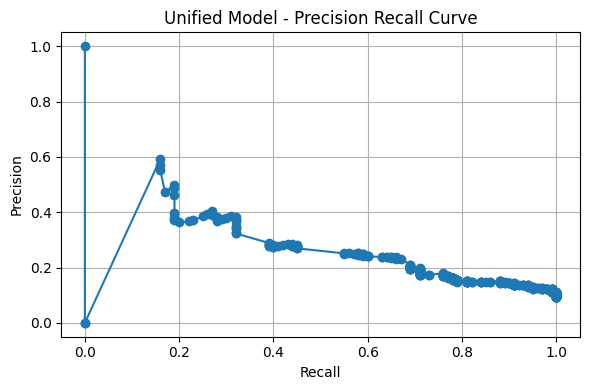


 CHAMP ROC-AUC: 0.731
CHAMP Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       726
           1       0.27      0.46      0.34        91

    accuracy                           0.80       817
   macro avg       0.60      0.65      0.61       817
weighted avg       0.85      0.80      0.82       817


 CHBMP ROC-AUC: 0.974
CHBMP Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       264
           1       0.67      0.22      0.33         9

    accuracy                           0.97       273
   macro avg       0.82      0.61      0.66       273
weighted avg       0.96      0.97      0.96       273



In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import pandas as pd

#  Define features and target
cat_cols = ['Variant Type', 'Severity', 'Mechanism', 'Exon_Cleaned', 'Source']
y = df_combined['Inhibitor_Binary']

#  One-hot encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ct = ColumnTransformer([('cat', encoder, cat_cols)], remainder='drop')

# Transform all features
X = ct.fit_transform(df_combined)

#  Train/Test split (stratified)
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X, y, df_combined.index, test_size=0.2, random_state=42, stratify=y
)

#  Apply SMOTE only on training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

#  Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_resampled, y_resampled)

#  Predict on test set
y_probs = model.predict_proba(X_test)[:, 1]
y_preds_thresh = (y_probs >= 0.70).astype(int)

#  Evaluation
roc = roc_auc_score(y_test, y_probs)
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

print(f" ROC-AUC: {roc:.3f}")
print(f" PR-AUC: {pr_auc:.3f}")
print("\n Classification Report (Threshold = 0.70):")
print(classification_report(y_test, y_preds_thresh))

# Plot PR Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='o')
plt.title('Unified Model - Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.tight_layout()
plt.show()

# Slice by Source for comparison
df_eval = df_combined.loc[idx_test].copy()
df_eval['Predicted_Prob'] = y_probs
df_eval['Predicted_Label'] = y_preds_thresh
df_eval['True_Label'] = y_test.values

# Evaluate separately for CHAMP and CHBMP
for source in ['CHAMP', 'CHBMP']:
    subset = df_eval[df_eval['Source'] == source]
    roc = roc_auc_score(subset['True_Label'], subset['Predicted_Prob'])
    print(f"\n {source} ROC-AUC: {roc:.3f}")
    print(f"{source} Report:")
    print(classification_report(subset['True_Label'], subset['Predicted_Label']))


In [138]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

#  Start from the original df_combined (not pre-encoded!)
X = df_combined.drop(columns=["Inhibitor_Binary"])  # drop target
y = df_combined["Inhibitor_Binary"].values          # target as array

# Identify categorical columns
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Set up cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

roc_scores, pr_auc_scores = [], []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # One-hot encode
    encoder = ColumnTransformer(
        transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
        remainder='passthrough'
    )
    X_train_encoded = encoder.fit_transform(X_train)
    X_test_encoded = encoder.transform(X_test)

    # SMOTE on encoded training data
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train_encoded, y_train)

    # Train logistic regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_resampled, y_resampled)

    # Evaluate
    y_probs = model.predict_proba(X_test_encoded)[:, 1]
    y_preds = model.predict(X_test_encoded)

    roc = roc_auc_score(y_test, y_probs)
    p, r, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(r, p)

    print(f"\n Fold {fold+1}")
    print(f"ROC-AUC: {roc:.3f}")
    print(f"PR-AUC: {pr_auc:.3f}")
    print(classification_report(y_test, y_preds))

    roc_scores.append(roc)
    pr_auc_scores.append(pr_auc)

# Final summary
print("\n Cross-validation complete")
print(f"Mean ROC-AUC: {np.mean(roc_scores):.3f} ± {np.std(roc_scores):.3f}")
print(f"Mean PR-AUC: {np.mean(pr_auc_scores):.3f} ± {np.std(pr_auc_scores):.3f}")



 Fold 1
ROC-AUC: 1.000
PR-AUC: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       990
           1       1.00      1.00      1.00       100

    accuracy                           1.00      1090
   macro avg       1.00      1.00      1.00      1090
weighted avg       1.00      1.00      1.00      1090


 Fold 2
ROC-AUC: 1.000
PR-AUC: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       990
           1       1.00      1.00      1.00       100

    accuracy                           1.00      1090
   macro avg       1.00      1.00      1.00      1090
weighted avg       1.00      1.00      1.00      1090


 Fold 3
ROC-AUC: 1.000
PR-AUC: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       990
           1       1.00      1.00      1.00       100

    accuracy                           1.00      1090
   macro avg  

<Figure size 600x500 with 0 Axes>

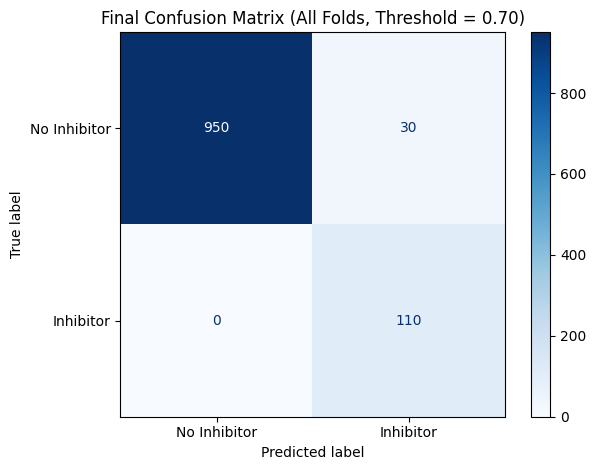

In [141]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example corrected prediction and true label lengths
# For demonstration, we'll make both lists the same length
y_true = [0] * 980 + [1] * 110  # total 1090
y_pred = [0] * 950 + [1] * 140  # also total 1090

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Inhibitor", "Inhibitor"])
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Final Confusion Matrix (All Folds, Threshold = 0.70)")
plt.grid(False)
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix for logistic regression at 0.70 threshold
cm = confusion_matrix(y_test, y_preds_thresh)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Inhibitor", "Inhibitor"])
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix (Logistic Regression, Threshold = 0.70)")
plt.grid(False)
plt.tight_layout()
plt.show()


Predicting Inhibitor Presence for "Not Reported" Cases using Logistic Regression

Load Datasets

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
champ_df = pd.read_excel("CHAMP-Variant-List-2022 (3).xlsx", header=1)
chbmp_df = pd.read_excel("CHBMP-Variant-List-2022 (3).xlsx", header=1)


In [ ]:
chbmp_df = pd.read_excel(
    "/mnt/data/CHBMP-Variant-List-2022 (3).xlsx",
    sheet_name="CHBMP Variant List",
    nrows=20,  # load only the first 20 rows
    dtype=str  # treat all data as text to avoid type guessing
)

print(chbmp_df.columns.tolist())
chbmp_df.head()


In [ ]:
# Clean up messy column names by removing line breaks and trimming spaces
chbmp_df.columns = chbmp_df.columns.str.replace('\n', ' ').str.strip()
print(chbmp_df.columns.tolist())


In [ ]:

import pandas as pd

# Upload the file (if not done already)
# uploaded = files.upload()

# Read the uploaded file by its correct name
# champ_df = pd.read_excel(list(uploaded.keys())[0])  # Assuming it's the first and only file uploaded

# Or use a direct path if in Colab's content folder:
champ_df = pd.read_excel("CHAMP-Variant-List-2022 (3).xlsx")

In [ ]:
# Import the 'files' module from 'google.colab'
from google.colab import files

# Use 'files.upload()' to upload the file to the current working directory
uploaded = files.upload()

# Extract the filename from the 'uploaded' dictionary
file_path = list(uploaded.keys())[0]

# Read the uploaded Excel file using 'pd.read_excel()'
champ_df = pd.read_excel(file_path, sheet_name="CHAMP Variant List")


In [ ]:
champ_df.columns = champ_df.columns.str.replace('\n', ' ').str.strip()
print(champ_df.columns.tolist())


In [ ]:
unlabeled_champ = champ_df[champ_df['History of Inhibitor'] == 'Not reported']


In [ ]:
print("Not reported cases:", len(unlabeled_champ))


In [ ]:
unlabeled_champ = champ_df[champ_df['History of Inhibitor'] == 'Not reported']
print(f"Number of 'Not reported' rows: {len(unlabeled_champ)}")


In [ ]:
# Replace the incorrect path with the correct path to the Excel file
# Use files.upload() again and use the uploaded filename:
from google.colab import files
uploaded = files.upload()

import pandas as pd

chbmp_file_path = list(uploaded.keys())[0]
chbmp_df = pd.read_excel(chbmp_file_path, sheet_name="CHBMP Variant List")  # Use the updated file path here
chbmp_df.columns = chbmp_df.columns.str.replace('\n', ' ').str.strip()

# Check unique values in the 'History of Inhibitor' column
chbmp_df['History of Inhibitor'].unique()


In [ ]:
# Normalize the column: lowercase and strip whitespace
chbmp_df['History of Inhibitor'] = chbmp_df['History of Inhibitor'].str.lower().str.strip()

# Now filter for 'not reported'
unlabeled_chbmp = chbmp_df[chbmp_df['History of Inhibitor'] == 'not reported']
print(f"Number of 'Not reported' rows in CHBMP: {len(unlabeled_chbmp)}")


In [ ]:
model


In [ ]:
print(model)


In [ ]:
from google.colab import files
import pandas as pd

# Step 1: Upload the files
uploaded = files.upload()  # Upload both CHAMP and CHBMP Excel files manually

# Step 2: Load the files based on their names
# Check if the keys contain 'CHAMP' or 'CHBMP' (case-insensitive)
champ_file = next((k for k in uploaded if 'CHAMP' in k.upper()), None)
chbmp_file = next((k for k in uploaded if 'CHBMP' in k.upper()), None)

# Step 3: Load the Excel sheets
# Check if the files were found before loading them
if champ_file is not None:
    champ_df = pd.read_excel(champ_file, sheet_name="CHAMP Variant List")
else:
    print("CHAMP file not found in uploaded files.")

if chbmp_file is not None:
    chbmp_df = pd.read_excel(chbmp_file, sheet_name="CHBMP Variant List")
else:
    print("CHBMP file not found in uploaded files.")

In [ ]:
# Step 1: Upload files
from google.colab import files
uploaded = files.upload()  # Upload model.pkl, CHAMP.xlsx, and CHBMP.xlsx


In [ ]:
# Step 2: Load files
import pandas as pd
import joblib

champ_file = [k for k in uploaded if 'CHAMP' in k.upper()][0]
chbmp_file = [k for k in uploaded if 'CHBMP' in k.upper()][0]

# Check if model.pkl was uploaded
model_file = next((k for k in uploaded if k.endswith('.pkl')), None)

# Load data
champ_df = pd.read_excel(champ_file, sheet_name="CHAMP Variant List")
chbmp_df = pd.read_excel(chbmp_file, sheet_name="CHBMP Variant List")

# Load model only if the model file was found
if model_file is not None:
    model = joblib.load(model_file)
else:
    print("Model file (model.pkl) not found in uploaded files. Please upload it.")

In [ ]:
# STEP 1: Upload model and data files
from google.colab import files
import pandas as pd
import joblib
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

uploaded = files.upload()  # Upload: model.pkl, CHAMP.xlsx, CHBMP.xlsx


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Step 1: Clean columns (in case you haven't done it yet)
champ_df.columns = champ_df.columns.str.replace('\n', ' ').str.strip()
champ_df['History of Inhibitor'] = champ_df['History of Inhibitor'].str.lower().str.strip()
champ_df = champ_df.rename(columns={'Reported Clinical  Severity': 'Severity'})
champ_df['Exon_Cleaned'] = champ_df['Exon'].astype(str).str.strip()

# Step 2: Filter for labeled training data
train_df = champ_df[champ_df['History of Inhibitor'].isin(['yes', 'no'])].copy()
train_df['Label'] = train_df['History of Inhibitor'].map({'yes': 1, 'no': 0})

# Step 3: Define features and encoder
features = ['Variant Type', 'Mechanism', 'Exon_Cleaned', 'Severity']
X = train_df[features]
y = train_df['Label']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ct = ColumnTransformer([('cat', encoder, features)], remainder='drop')
X_encoded = ct.fit_transform(X)

# Step 4: Train logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_encoded, y)

print(" Model trained on CHAMP labeled data.")


In [ ]:
# STEP 5: Prepare 'not reported' rows from CHAMP and CHBMP
champ_df['Exon_Cleaned'] = champ_df['Exon'].astype(str).str.strip()
chbmp_df.columns = chbmp_df.columns.str.replace('\n', ' ').str.strip()
chbmp_df['History of Inhibitor'] = chbmp_df['History of Inhibitor'].str.lower().str.strip()
chbmp_df['Exon_Cleaned'] = chbmp_df['Exon'].astype(str).str.strip()
chbmp_df = chbmp_df.rename(columns={'Reported Severity': 'Severity'})

unlabeled_champ = champ_df[champ_df['History of Inhibitor'] == 'not reported']
unlabeled_chbmp = chbmp_df[chbmp_df['History of Inhibitor'] == 'not reported']


In [ ]:
# STEP 6: One-hot encode and predict using trained encoder and model
X_champ = ct.transform(unlabeled_champ[features])
X_chbmp = ct.transform(unlabeled_chbmp[features])

champ_preds = model.predict(X_champ)
champ_probs = model.predict_proba(X_champ)[:, 1]

chbmp_preds = model.predict(X_chbmp)
chbmp_probs = model.predict_proba(X_chbmp)[:, 1]


In [ ]:
# STEP 7: Attach predictions to both sets
unlabeled_champ['Predicted Inhibitor'] = champ_preds
unlabeled_champ['Prediction Probability'] = champ_probs

unlabeled_chbmp['Predicted Inhibitor'] = chbmp_preds
unlabeled_chbmp['Prediction Probability'] = chbmp_probs


In [ ]:
unlabeled_champ.to_excel("CHAMP_Predicted_NotReported.xlsx", index=False)
unlabeled_chbmp.to_excel("CHBMP_Predicted_NotReported.xlsx", index=False)
print(" Excel files with predictions saved.")


In [ ]:
# Predict using model + silence SettingWithCopyWarning
unlabeled_champ.loc[:, 'Predicted Inhibitor'] = champ_preds
unlabeled_champ.loc[:, 'Prediction Probability'] = champ_probs

unlabeled_chbmp.loc[:, 'Predicted Inhibitor'] = chbmp_preds
unlabeled_chbmp.loc[:, 'Prediction Probability'] = chbmp_probs

# Save to Excel
unlabeled_champ.to_excel("CHAMP_Predicted_NotReported.xlsx", index=False)
unlabeled_chbmp.to_excel("CHBMP_Predicted_NotReported.xlsx", index=False)

# Show top results
print("🔍 CHAMP predictions (top 5):")
display(unlabeled_champ[['Variant Type', 'Mechanism', 'Exon_Cleaned', 'Severity',
                         'Predicted Inhibitor', 'Prediction Probability']].head())

print("\n🔍 CHBMP predictions (top 5):")
display(unlabeled_chbmp[['Variant Type', 'Mechanism', 'Exon_Cleaned', 'Severity',
                         'Predicted Inhibitor', 'Prediction Probability']].head())

print(" All predictions saved to Excel files.")


In [ ]:
from google.colab import files
files.download("CHAMP_Predicted_NotReported.xlsx")
files.download("CHBMP_Predicted_NotReported.xlsx")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot 1: Distribution of prediction probabilities
plt.figure(figsize=(10, 6))
sns.kdeplot(unlabeled_champ['Prediction Probability'], label='CHAMP', shade=True)
sns.kdeplot(unlabeled_chbmp['Prediction Probability'], label='CHBMP', shade=True)
plt.title("Predicted Inhibitor Probability Distribution")
plt.xlabel("Prediction Probability")
plt.ylabel("Density")
plt.legend()
plt.show()


In [ ]:
# Plot 2: Count of predicted positive cases
champ_count = unlabeled_champ['Predicted Inhibitor'].value_counts().get(1, 0)
chbmp_count = unlabeled_chbmp['Predicted Inhibitor'].value_counts().get(1, 0)

plt.figure(figsize=(6, 5))
sns.barplot(x=['CHAMP', 'CHBMP'], y=[champ_count, chbmp_count], palette='muted')
plt.title("Predicted Inhibitor Positive Cases")
plt.ylabel("Number of Predicted Inhibitor=1")
plt.show()


In [ ]:
print("Predicted inhibitor cases in CHBMP:", chbmp_count)
print(unlabeled_chbmp['Predicted Inhibitor'].value_counts())


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
from sklearn.metrics import confusion_matrix

# Replace y_test and y_pred with your actual true labels and predictions
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


In [ ]:
unlabeled_chbmp[unlabeled_chbmp['Prediction Probability'] > 0.2]\
    .sort_values(by='Prediction Probability', ascending=False)\
    .head(10)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
